# **Micro-Projet Biostatistiques**

Antoine Bridier-Nahmias et Claire Vandiedonck - UE3 "Analyses de données" de la mineure "Recherche en Santé" - Université Paris Cité

<mark>Notebook à positionner dans le repretoire <code>~/pass_minrs_ue3/micro_projet_bi/</code></mark>

## Polymorphisme dans _BRCA1_ à partir des données du projet 1000 genomes

Ce micro-projet a pour objectif d'explorer la variabilité génétique du gène _BRCA1_ au moyen des données du projet  ['1000 genomes'](https://www.internationalgenome.org/home).<br>
Il fait suite au micro-projet Unix dans lequel nous avions récupéré le fichier `.vcf` (pour *variant calling format)* de variants du chromosome 17 du projet 1000 genomes. <br>
Dans ce micro-projet, nous utiliserons un sous-fichier `.vcf` d'une portion du chromosome 17. Ce fichier a été **annoté** au moyen du logiciel [ANNOVAR](https://annovar.openbioinformatics.org/en/latest/). Les annotations ainsi ajoutées dans les 1ères collones (avant les génotypes) incluent:
- l'identifiant `rsID` de chaque variant dans la base de données [dbSNP](https://www.ncbi.nlm.nih.gov/snp/) du ncbi
- la position de chaque variant relative aux différents gènes
- l'impact fonctionnel putatif de chaque variant sur la protéine
- des données de fréquences

Notre objectif sera, avec le langage R:<br>
1. d'étudier la distribution des variants en fonction de leur position le long du gène *BRCA1*
2. d'explorer le degré d'hétérozygotie de ces variants
3. d'évaluer la pathogénicité de ces variants
4. d'explorer la variabilité génétique de *BRCA1* selon les populations

<div class="alert alert-warning"><b> Modalités d'évaluation :</b><br><br>
Les boîtes oranges contiennent des instructions que vous allez devoir traduire en commandes R.
Une partie de la commande peut vous être donnée, à vous de la compléter en remplacant les <b>[XXX]</b>.
<br/>
<br/>
    L'évaluation consistera en un simple questionnaire numéroté sur <b>moodle</b> dans lequel vous devrez reporter ce par quoi vous avez remplacé ces <b>[XXX]</b>, le résultat de certaines commandes ou encore des champs de réponses libres.
<br/>
<br/>
Contrairement à ce qui vous avait initialement été indiqué, le travail sera évalué <u><b>individuellement et NON en binôme</b></u>, le format du micro-projet ayant été simplifié. La date limite pour rendre vos réponses sur moodle est fixée au <u><b>10/05/2023 20h00</b></u>.
</div>

Avant de commencer, on se positionne dans le bon repertoire de travail, on affiche la version de R utilisée et les paquets chargés dans la session. 

In [1]:
##### cell 1
setwd("~/pass_minrs_ue3/micro_projet_bi/")
getwd()
library(tidyverse)
library(FactoMineR)
library(factoextra)
library(ggpubr)
sessionInfo()

[1] "/srv/home/cvandiedonck/pass_minrs_ue3/micro_projet_bi"

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.6.0     factoextra_1.0.7 FactoMineR_2.7   lubridate_1.9.2 
 [5] forcats_1.0.0    stringr_1.5.0    dplyr_1.1.0      purrr_1.0.1     
 [9] readr_2.1.4      tidyr_1.3.0      tibble_3.2.1     ggplot2_3.4.1   
[13] tidyverse_2.0.0 

loaded via a namespace (and not attached):
 [1] ggrepel_0.9.3        Rcpp

## I. Chargement des données
---

### I.A. Chargement du .vcf

On charge d'abord le fichier tabulé `.vcf` annoté avec ANNOVAR. Il a été mis dans le répertoire `/srv/data/pass-rs-ue3/brca1/` sur adenine. <mark>Cette commande peut prendre quelques secondes.</mark>

In [2]:
##### cell 2
vcf_annot <-  read.table('/srv/data/pass-rs-ue3/brca1/chr17_brca1.tsv',
                         header = TRUE,
                         sep = "\t")
str(vcf_annot)

'data.frame':	4918 obs. of  2697 variables:
 $ Chr                       : int  17 17 17 17 17 17 17 17 17 17 ...
 $ Start                     : int  43000018 43000031 43000140 43000159 43000219 43000222 43000226 43000262 43000486 43000490 ...
 $ End                       : int  43000018 43000031 43000140 43000162 43000219 43000222 43000226 43000262 43000486 43000490 ...
 $ Ref                       : chr  "C" "G" "C" "AGAC" ...
 $ Alt                       : chr  "T" "A" "T" "-" ...
 $ Func.refGene              : chr  "exonic" "exonic" "intronic" "intronic" ...
 $ Gene.refGene              : chr  "RPL27" "RPL27" "RPL27" "RPL27" ...
 $ GeneDetail.refGene        : chr  NA NA NA NA ...
 $ ExonicFunc.refGene        : chr  "nonsynonymous SNV" "synonymous SNV" NA NA ...
 $ AAChange.refGene          : chr  "RPL27:NM_001349922:exon2:c.C167T:p.A56V,RPL27:NM_000988:exon3:c.C167T:p.A56V,RPL27:NM_001349921:exon3:c.C167T:p.A56V" "RPL27:NM_001349922:exon2:c.G180A:p.K60K,RPL27:NM_000988:exon3:c.G180

### I.B. Chargement des metadata

On charge à présent un fichier de données supplémentaires (*metadata*) donnant des indications sur les sujets inclus dans le projet 1000 genomes, en particulier leur sexe et leur origine géographique. Ce fichier est dans le répertoire relatif au chromosome 17 sur adenine.

In [3]:
##### cell 3
metadata <- read.table('/srv/data/pass-rs-ue3/hg38-chr17-1kgenome/20130606_g1k_3202_samples_ped_population.txt',
                       sep=" ",
                       header = TRUE)
str(metadata)

'data.frame':	3202 obs. of  7 variables:
 $ FamilyID       : chr  "HG00096" "HG00097" "HG00099" "HG00100" ...
 $ SampleID       : chr  "HG00096" "HG00097" "HG00099" "HG00100" ...
 $ FatherID       : chr  "0" "0" "0" "0" ...
 $ MotherID       : chr  "0" "0" "0" "0" ...
 $ Sex            : int  1 2 2 2 1 2 1 1 2 1 ...
 $ Population     : chr  "GBR" "GBR" "GBR" "GBR" ...
 $ Superpopulation: chr  "EUR" "EUR" "EUR" "EUR" ...


=> Nous avons à présent deux objets chargés dans notre session R, comme l'indique le résultat de la commande `ls()`

In [4]:
##### cell 4
ls()

[1] "metadata"  "vcf_annot"

## II. Un premier regard sur les données de variants...
---


### II.A. Dimensions du fichier .vcf annoté

Chaque ligne représente un SNV (*Single Nucleotide Variant*) et les sujets font partie des variables mises en colonnes.

In [5]:
##### cell 5
dim(vcf_annot)
head(vcf_annot)

[1] 4918 2697

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,⋯,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,17,43000018,43000018,C,T,exonic,RPL27,NA,nonsynonymous SNV,"RPL27:NM_001349922:exon2:c.C167T:p.A56V,RPL27:NM_000988:exon3:c.C167T:p.A56V,RPL27:NM_001349921:exon3:c.C167T:p.A56V",⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,17,43000031,43000031,G,A,exonic,RPL27,NA,synonymous SNV,"RPL27:NM_001349922:exon2:c.G180A:p.K60K,RPL27:NM_000988:exon3:c.G180A:p.K60K,RPL27:NM_001349921:exon3:c.G180A:p.K60K",⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
3,17,43000140,43000140,C,T,intronic,RPL27,NA,NA,NA,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,17,43000159,43000162,AGAC,-,intronic,RPL27,NA,NA,NA,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
5,17,43000219,43000219,T,A,intronic,RPL27,NA,NA,NA,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
6,17,43000222,43000222,A,G,intronic,RPL27,NA,NA,NA,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


Compte tenu des dimensions de `vcf_annot`, dans un notebook jupyter, l'affichage de toutes les colonnes est en partie masqué lorsque vous utilisez la fonction `head()` ou `str()`. Vous pouvez aussi afficher les noms des colonnes avec la fonction `names()`. Là encore l'affichage sera réduit dans un notebook Jupyter mais vous pouvez lire plus de colonnes.

In [6]:
##### cell 6
names(vcf_annot)

[1] "Chr"                        "Start"                     
   [3] "End"                        "Ref"                       
   [5] "Alt"                        "Func.refGene"              
   [7] "Gene.refGene"               "GeneDetail.refGene"        
   [9] "ExonicFunc.refGene"         "AAChange.refGene"          
  [11] "Func.ensGene"               "Gene.ensGene"              
  [13] "GeneDetail.ensGene"         "ExonicFunc.ensGene"        
  [15] "AAChange.ensGene"           "avsnp150"                  
  [17] "gnomAD_exome_ALL"           "gnomAD_exome_AFR"          
  [19] "gnomAD_exome_AMR"           "gnomAD_exome_ASJ"          
  [21] "gnomAD_exome_EAS"           "gnomAD_exome_FIN"          
  [23] "gnomAD_exome_NFE"           "gnomAD_exome_OTH"          
  [25] "gnomAD_exome_SAS"           "AF"                        
  [27] "AF_raw"                     "AF_male"                   
  [29] "AF_female"                  "AF_afr"                    
  [31] "AF_ami"                     "AF_amr"                    
  [33] "AF_asj"                     "AF_eas"                    
  [35] "AF_fin"                     "AF_nfe"                    
  [37] "AF_oth"                     "AF_sas"                    
  [39] "GME_AF"                     "GME_NWA"                   
  [41] "GME_NEA"                    "GME_AP"                    
  [43] "GME_Israel"                 "GME_SD"                    
  [45] "GME_TP"                     "GME_CA"                    
  [47] "CLNALLELEID"                "CLNDN"                     
  [49] "CLNDISDB"                   "CLNREVSTAT"                
  [51] "CLNSIG"                     "mcap_score"                
  [53] "mcap_sensitivity"           "REVEL"                     
  [55] "DamagePredCount"            "SIFT_pred"                 
  [57] "SIFT4G_pred"                "Polyphen2_HDIV_pred"       
  [59] "Polyphen2_HVAR_pred"        "LRT_pred"                  
  [61] "MutationTaster_pred"        "MutationAssessor_pred"     
  [63] "FATHMM_pred"                "PROVEAN_pred"              
  [65] "VEST4_score"                "MetaSVM_pred"              
  [67] "MetaLR_pred"                "M.CAP_pred"                
  [69] "REVEL_score"                "MutPred_score"             
  [71] "MVP_score"                  "MPC_score"                 
  [73] "PrimateAI_pred"             "DEOGEN2_pred"              
  [75] "BayesDel_addAF_pred"        "BayesDel_noAF_pred"        
  [77] "ClinPred_pred"              "LIST.S2_pred"              
  [79] "CADD_raw"                   "CADD_phred"                
  [81] "DANN_score"                 "fathmm.MKL_coding_pred"    
  [83] "fathmm.XF_coding_pred"      "Eigen.raw_coding"          
  [85] "Eigen.phred_coding"         "Eigen.PC.raw_coding"       
  [87] "Eigen.PC.phred_coding"      "GenoCanyon_score"          
  [89] "integrated_fitCons_score"   "GM12878_fitCons_score"     
  [91] "H1.hESC_fitCons_score"      "HUVEC_fitCons_score"       
  [93] "LINSIGHT"                   "GERP.._NR"                 
  [95] "GERP.._RS"                  "phyloP100way_vertebrate"   
  [97] "phyloP30way_mammalian"      "phyloP17way_primate"       
  [99] "phastCons100way_vertebrate" "phastCons30way_mammalian"  
 [101] "phastCons17way_primate"     "bStatistic"                
 [103] "Interpro_domain"            "GTEx_V8_gene"              
 [105] "GTEx_V8_tissue"             "InterVar_automated"        
 [107] "PVS1"                       "PS1"                       
 [109] "PS2"                        "PS3"                       
 [111] "PS4"                        "PM1"                       
 [113] "PM2"                        "PM3"                       
 [115] "PM4"                        "PM5"                       
 [117] "PM6"                        "PP1"                       
 [119] "PP2"                        "PP3"                       
 [121] "PP4"                        "PP5"                       
 [123] "BA1"                        "B

<div class="alert alert-warning"> 
    <p>
        <b>Question 1)</b> A propos de <code>vcf_annot</code> :<br>
           &emsp; Le dataset contient les informations de 2697 SNVs ? 
            <br>
           &emsp; Le dataset contient les informations de 4918 sujets ?
            <br>
           &emsp; Le dataset contient les informations de 4918 SNVs ? 
            <br>
           &emsp; Le dataset contient les informations de 2697 sujets ?
            <br>
           &emsp; Le dataset contient les informations de moins de 2697 sujets ?
    </p>
</div>

### II.B. Gènes présents dans le fichier .vcf annoté

Les colonnes d'annotations relatives aux gènes sont les suivantes:

In [7]:
##### cell 7
gene_columns <- grep("Gene", names(vcf_annot))
names(vcf_annot)[gene_columns]

[1] "Func.refGene"       "Gene.refGene"       "GeneDetail.refGene"
 [4] "ExonicFunc.refGene" "AAChange.refGene"   "Func.ensGene"      
 [7] "Gene.ensGene"       "GeneDetail.ensGene" "ExonicFunc.ensGene"
[10] "AAChange.ensGene"

=> Il existe plusieurs versions d'annotations des gènes sur le génome (positions des gènes).  Dans le fichier `.vcf` annoté, les colonnes dont le nom se termine par `.refGene` sont celles de l'annotation [RefSeq](https://www.ncbi.nlm.nih.gov/refseq/) du génome, tandis que les colonnes se terminant par `.ensGene` sont celles de l'annotation [ENSEMBL](https://www.ensembl.org/index.html) du génome. Le symbole du gène est disponible dans les colonnes `Gene.refGene` ou `Gene.ensGene`. Pour la suite de ce micro-projet, nous utiliserons exclusivement les annotations de ***RefSeq***.

Nous pouvons lister toutes les co-occurences uniques de noms de gènes dans notre fichier de variants avec la fonction `unique()` ou la fonction `table()` qui permet en plus de compter le nombre d'occurences par gène.

In [8]:
##### cell 8
unique(vcf_annot$Gene.refGene)
table(vcf_annot$Gene.refGene, useNA = "always")

[1] "RPL27"             "RPL27;IFI35"       "IFI35"            
 [4] "IFI35;VAT1"        "VAT1"              "VAT1;RND2"        
 [7] "RND2"              "RND2;BRCA1"        "BRCA1"            
[10] "BRCA1;NBR2"        "NBR2"              "LOC101929767"     
[13] "LOC101929767;NBR2" "LOC101929767;NBR1" "NBR1"


            BRCA1        BRCA1;NBR2             IFI35        IFI35;VAT1 
             1969                 1               241                 2 
     LOC101929767 LOC101929767;NBR1 LOC101929767;NBR2              NBR1 
              389                 1               123               684 
             NBR2              RND2        RND2;BRCA1             RPL27 
              687               190               233               123 
      RPL27;IFI35              VAT1         VAT1;RND2              <NA> 
               43               220                12                 0 

### II.C. Création d'un sous-jeu de données pour le gène *BRCA1*

Par souci de simplicité pour ce microprojet, nous nous focalisons sur les variants pour lesquels le gène annoté est exclusivement *BRCA1*.

Nous réalisons donc un sous-jeu de données pour ce gène avec la fonction `subset()`.

In [9]:
##### cell 9

# Subsetting to keep BRCA1 only:
brca1_vcf <- subset(vcf_annot, Gene.refGene == 'BRCA1')
dim(brca1_vcf)

[1] 1969 2697

<div class="alert alert-warning"> 
    <b>Question 2) :</b>
    Le dataset ne contient-il désormais que des SNP présents dans <i>BRCA1</i> (vous pouvez vous aider de la commande <code>table()</code> ou d'une autre commande de votre choix).
</div>

<div class="alert alert-warning"> 
    <b>Question 3) :</b>
    Quelle commande avez-vous utilisé pour vous assurer que le dataframe `brca1_vcf` ne contenait que des SNP présents dans <i>BRCA1</i> ? (plusieurs commandes et écritures sont possibles, entrez la commande exacte que vous avez éxécutée).
</div>

In [10]:
##### cell 10

# Votre commande:
unique(brca1_vcf$Gene.refGene)
table(brca1_vcf$Gene.refGene, useNA = "always")

[1] "BRCA1"


BRCA1  <NA> 
 1969     0 

### II.D. Distribution des variants le long du gène *BRCA1*

Nous explorons à présent les données avec différentes représentations graphiques.

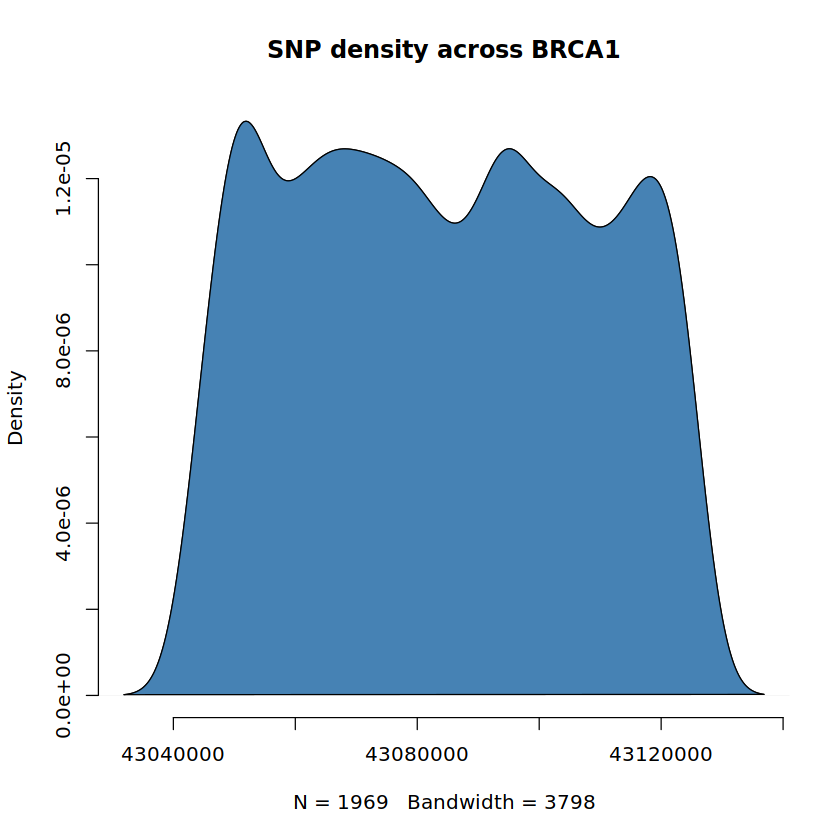

In [11]:
##### cell 11

# SNP distribution on BRCA1:
snp_density <- density(brca1_vcf$Start,
                       adjust = 0.8)

# plot the snp density
plot(x = snp_density,
     frame = FALSE,
     main = "SNP density across BRCA1")

# secondary fonction to color the area under the curve
polygon(snp_density,
        col = "steelblue") 

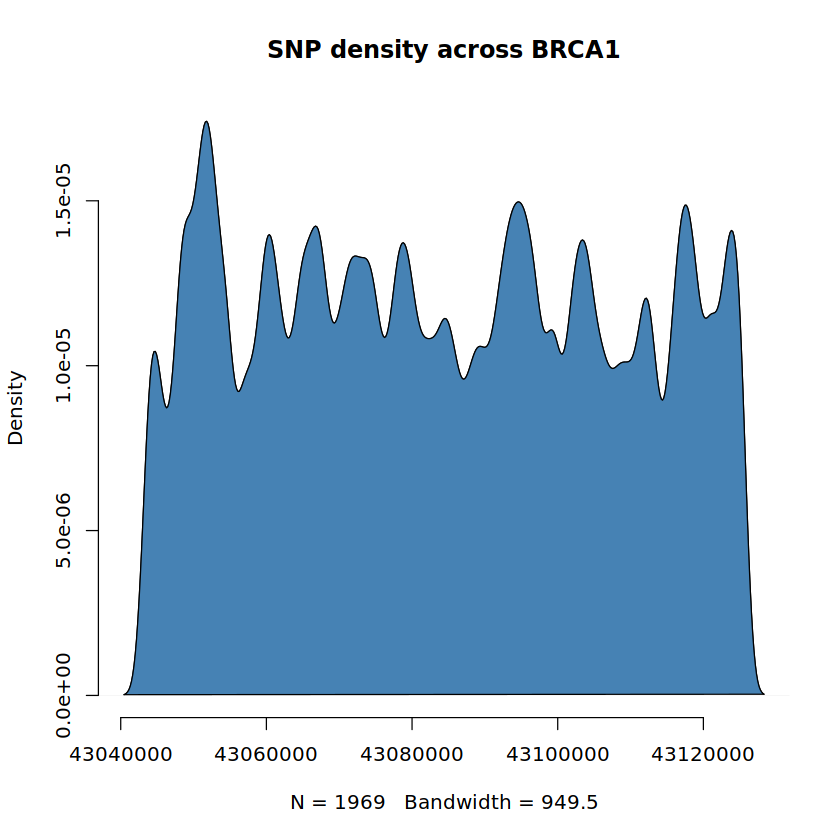

In [12]:
##### cell 12
snp_density <- density(brca1_vcf$Start,
                       adjust = 0.2)

plot(x = snp_density,
     frame = FALSE,
     main = "SNP density across BRCA1")

polygon(snp_density,
        col = "steelblue")

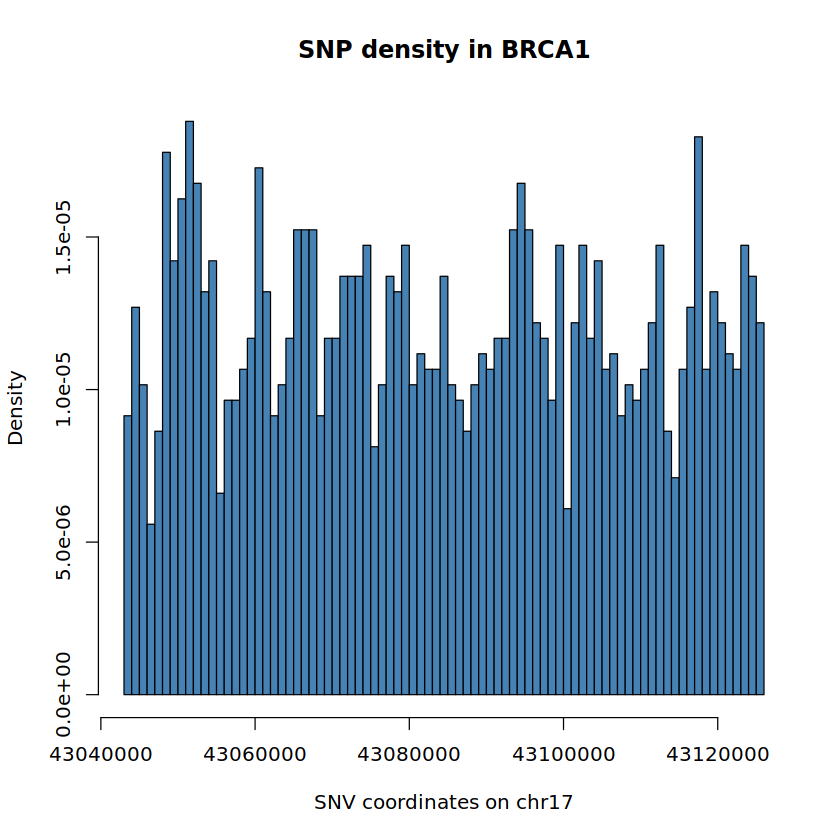

In [13]:
##### cell 13
hist(x = brca1_vcf$Start,
     main = "SNP density in BRCA1",
     breaks = 1e2,
     col = "steelblue",
     freq = FALSE,
     xlab = "SNV coordinates on chr17")

<div class="alert alert-warning"> 
    <b>Question 4) :</b>
        <br>
        &emsp;Ces plots représentent la densité en SNP le long du gène <i>BRCA1</i>. 
        <br>
        &emsp;Laquelle de ces représentations choisiriez-vous et pourquoi (justifiez en une brève phrase) ?
</div>

## III. Homo et hétéro-zygotie
---

### III.A. Génération d'une variable discrète *genotype* { 0, 1, 2 } indiquant le nombre de copies de l'allèle alternatif à l'allèle de référence sur la séquence du génome pour chaque individu. 

Dans le fichier `.vcf` les 149 1ères colonnes fournissent des annotations sur les SNVs, les suivantes donnent les génotypes phasés de chaque sujet du projet 1000 genomes.
Nous allons extraire les colonnes correspondantes dans 2 nouveaux objets R.

- **un dataframe pour les informations sur les variants** :

In [14]:
##### cell 14

# separating SNP and genotypes
brca1_snps <-  brca1_vcf[ , 1:149 ]

- **une matrice pour les informations sur les génotypes** avec une écriture simplifiée :

On opère en trois temps :
1. d'abord en extrayant les colonnes d'intérêt dans un sous-dataframe.

In [15]:
##### cell 15

# separating SNP and genotypes
brca1_samples <- brca1_vcf[ , 150:ncol(brca1_vcf) ]

2. Puis en créant une fonction pour automatiquement remplacer les génotypes phasés par le nombre de copies de l'allèle alternatif.

In [16]:
##### cell 16

# This function transforms the 0|0 , 1|0, 0|1 and 1|1 into a more numerical variable
# 0 is 0|0
# 1 is 0|1 or 1|0
# 2 is 1|1 

simplify_genotype <- function(genotype) {
    genotype <- unlist(genotype)
    out <- vector(mode = 'numeric', length = length(genotype))
    out[genotype == '0|0'] <- 0
    out[genotype == '1|0'] <- 1
    out[genotype == '0|1'] <- 1
    out[genotype == '1|1'] <- 2
    # out <- factor(x = out, levels = c(0, 1, 2), labels = c(0, 1, 2))
    return(out)
}

3. Et enfin en appliquant cette fonction sur le sous-dataframe et en obtenant une matrice de valeurs 0, 1 ou 2.

In [17]:
##### cell 17

# apply the transformation
brca1_genotypes <-  sapply(brca1_samples,
                            simplify_genotype,
                            simplify = TRUE)
str(brca1_genotypes)
brca1_genotypes[1:20, 1:20] # on affiche ici les 20 premiers SNVs pour les 20 premiers sujets

 num [1:1969, 1:2548] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2548] "HG00096" "HG00097" "HG00099" "HG00100" ...


HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,HG00107,HG00108,HG00109,HG00110,HG00111,HG00112,HG00113,HG00114,HG00115,HG00116
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### III.B. Comptes et plots

- Nous allons compter les **effectifs et proportion de chaque type de génotype sur l'ensemble des sujets et des variants** et faire une réprésentation graphique *<mark>(la cellule suivante prend quelques secondes à s'executer)</mark>*:

brca1_genotypes
      0       1       2 
4761111  179501   76400 

0,0.94899335
1,0.03577847
2,0.01522819


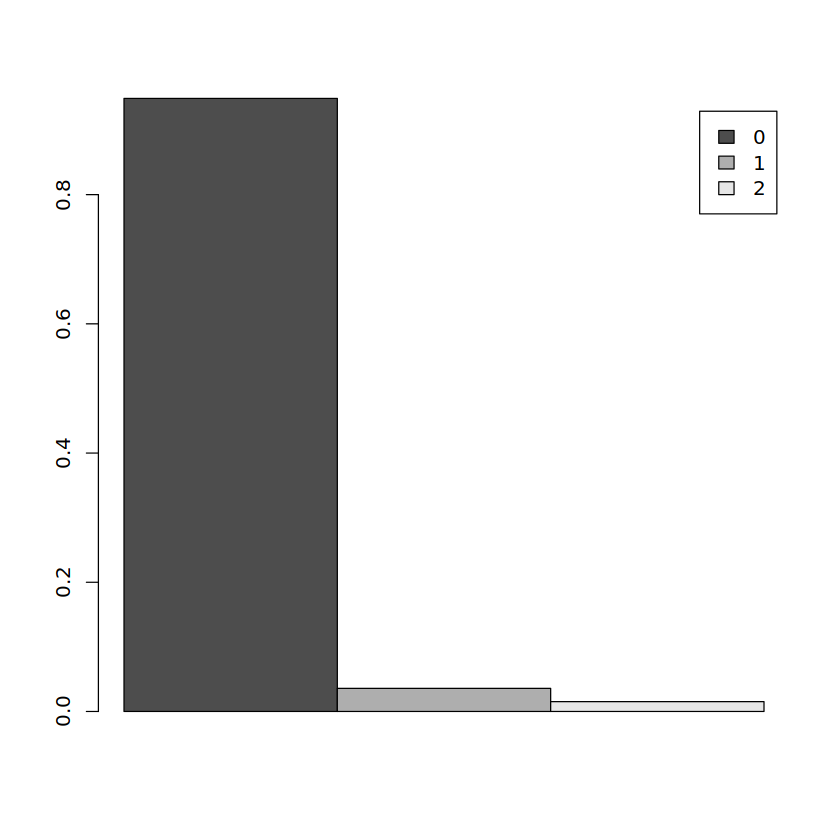

In [18]:
##### cell 18
table(brca1_genotypes)
proportions(as.matrix(table(brca1_genotypes)), 2)
barplot(proportions (as.matrix(table(brca1_genotypes)), 2),
    beside = TRUE, legend = 0:2)

Nous voyons que la majorité des génotypes sont homozygotes pour l'allèle de référence. Mais qu'en est-il pour chaque sujet et chaque SNV? 

- Nous allons à présent compter les **effectifs de chaque type de génotype par sujet**:

La fonction `apply()` avec l'argument `MARGIN = 2` permet d'appliquer une même fonction sur chaque ligne de l'objet X, ici générant une variable pour chaque génotype, contenant le comptes de variants par sujet.

In [19]:
##### cell 19

SNV_count_homozy_REF <- apply( X = brca1_genotypes,
                    MARGIN = 2,
                    FUN = function(x) sum(x == 0))
                              
SNV_count_heterozy <- apply(X = brca1_genotypes,
                  MARGIN = 2,
                  FUN = function(x) sum(x == 1))
                  
SNV_count_homozy_ALT <- apply(X = brca1_genotypes,
                    MARGIN = 2,
                    FUN = function(x) sum(x == 2))                    

Nous regroupons ces résultats dans un nouveau dataframe **SNV_count_zygo_df**, avec chaque type de génotype dans une colonne comme une variable quantitative séparée. Chaque ligne correspond ici à un sujet.

In [20]:
##### cell 20
SNV_count_zygo_df <- data.frame(SNV_count_homozy_REF, SNV_count_heterozy, SNV_count_homozy_ALT)
str(SNV_count_zygo_df)
head(SNV_count_zygo_df)

'data.frame':	2548 obs. of  3 variables:
 $ SNV_count_homozy_REF: int  1823 1962 1823 1813 1960 1805 1961 1817 1959 1818 ...
 $ SNV_count_heterozy  : int  140 3 142 152 5 19 4 148 6 147 ...
 $ SNV_count_homozy_ALT: int  6 4 4 4 4 145 4 4 4 4 ...


,SNV_count_homozy_REF,SNV_count_heterozy,SNV_count_homozy_ALT
,<int>,<int>,<int>
HG00096,1823,140,6
HG00097,1962,3,4
HG00099,1823,142,4
HG00100,1813,152,4
HG00101,1960,5,4
HG00102,1805,19,145


Dans le dataframe ci-dessus, chaque ligne donne le nombre de SNPs par catégorie de génotype pour l'individu de la ligne. A noter que pour chaque ligne, la somme des comptes (calculée avec la fonction `rowSums()`) donne le nombre de variants par individu, et que cette somme est la même pour chaque ligne comme l'indique le résumé ci-dessous.

In [21]:
##### cell 21
summary(rowSums(SNV_count_zygo_df))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1969    1969    1969    1969    1969    1969 

Dans le dataframe `SNV_count_zygo_df`, chaque colonne est une variable discrète. Ces 3 variables ne sont pas indépendantes car leur somme correspond au nombre de variants.

On peut regarder les valeurs de dispersion :

In [22]:
##### cell 22
summary(SNV_count_zygo_df)

 SNV_count_homozy_REF SNV_count_heterozy SNV_count_homozy_ALT
 Min.   :1772         Min.   :  0.00     Min.   :  1.00      
 1st Qu.:1812         1st Qu.:  8.00     1st Qu.:  4.00      
 Median :1820         Median : 36.00     Median :  5.00      
 Mean   :1869         Mean   : 70.45     Mean   : 29.98      
 3rd Qu.:1952         3rd Qu.:145.00     3rd Qu.: 34.00      
 Max.   :1965         Max.   :160.00     Max.   :157.00      

et représenter leur distribution avec un barplot, par exemple ci-dessous avec la variable sur le compte de SNVs homozygotes :

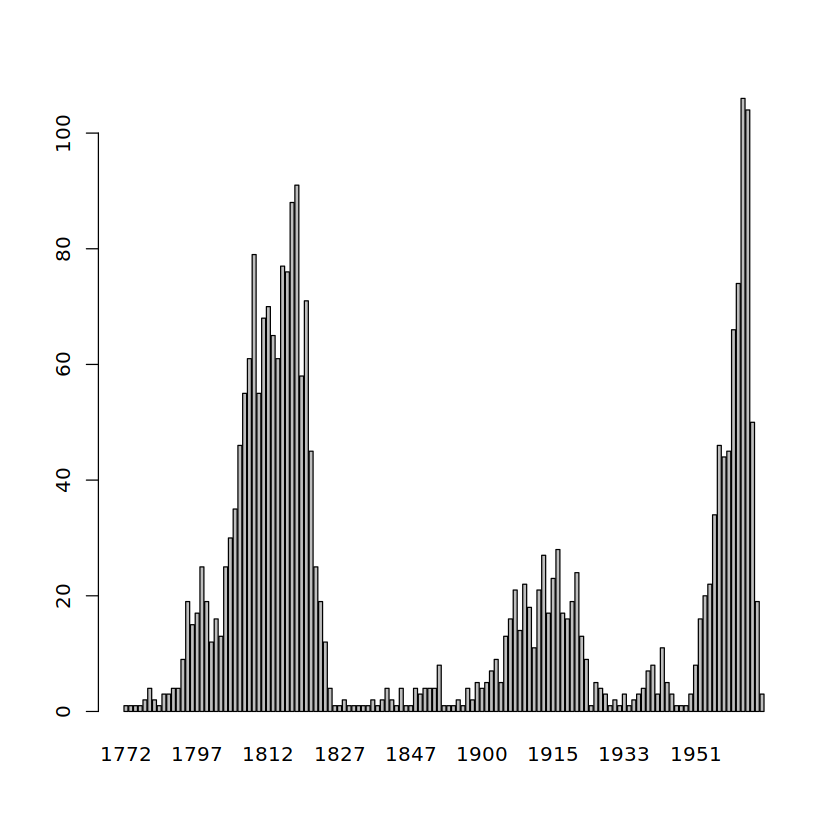

In [23]:
##### cell 23
barplot(table(SNV_count_homozy_REF))

Compte-tenu du nombre élevé de valeurs possibles pour chacune de ces variables {0, 1, ..., 1969}, on peut assimiler ces variables discrètes à des variables quantitatives continues et explorer aussi leur distribution avec un histogramme (en jouant sur le nombre d'intervalles) ou avec un boxplot par exemple.

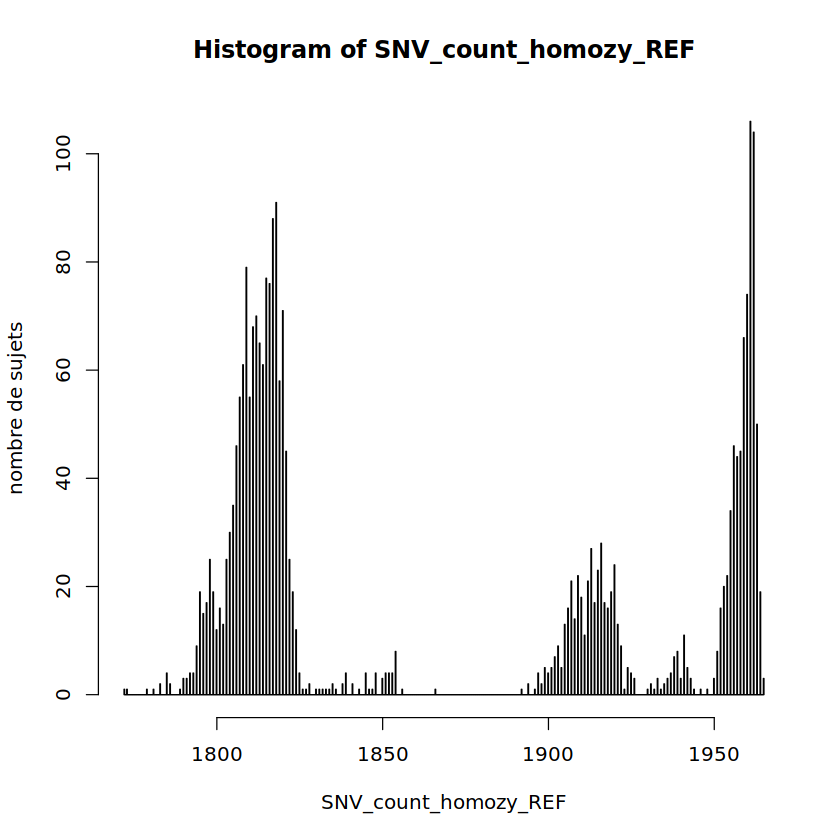

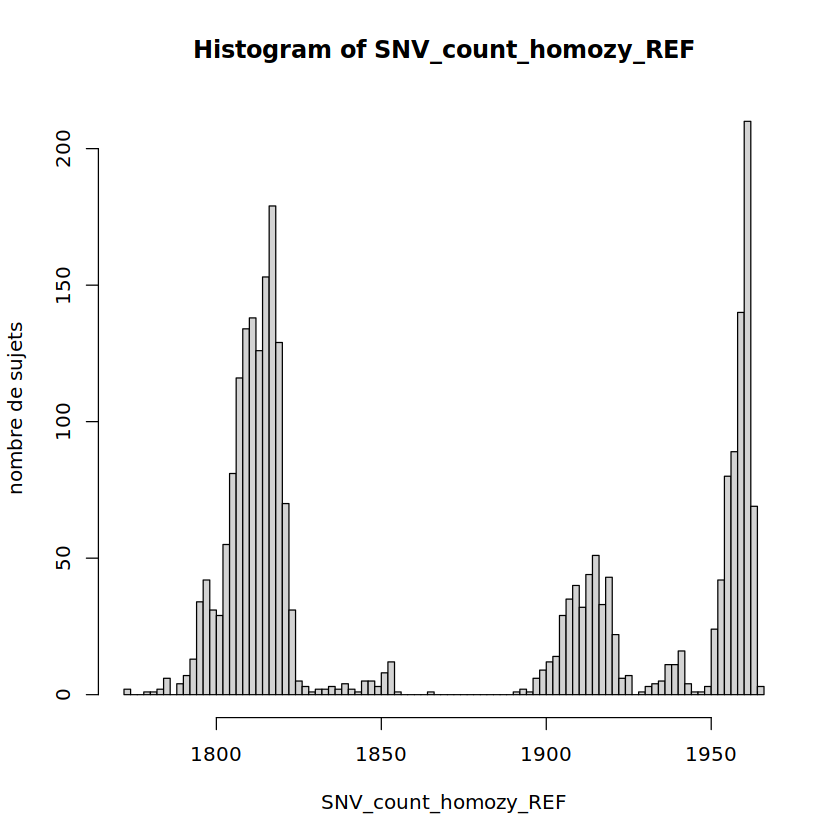

In [24]:
##### cell 24
hist(SNV_count_homozy_REF,
     ylab = "nombre de sujets",
     freq = TRUE,
     breaks = 1000 ) 

hist(SNV_count_homozy_REF,
     ylab = "nombre de sujets",
     freq = TRUE,
     breaks = 100 ) 

On représente maintenant les 3 histogrammes côte à côte dans un même graphique.

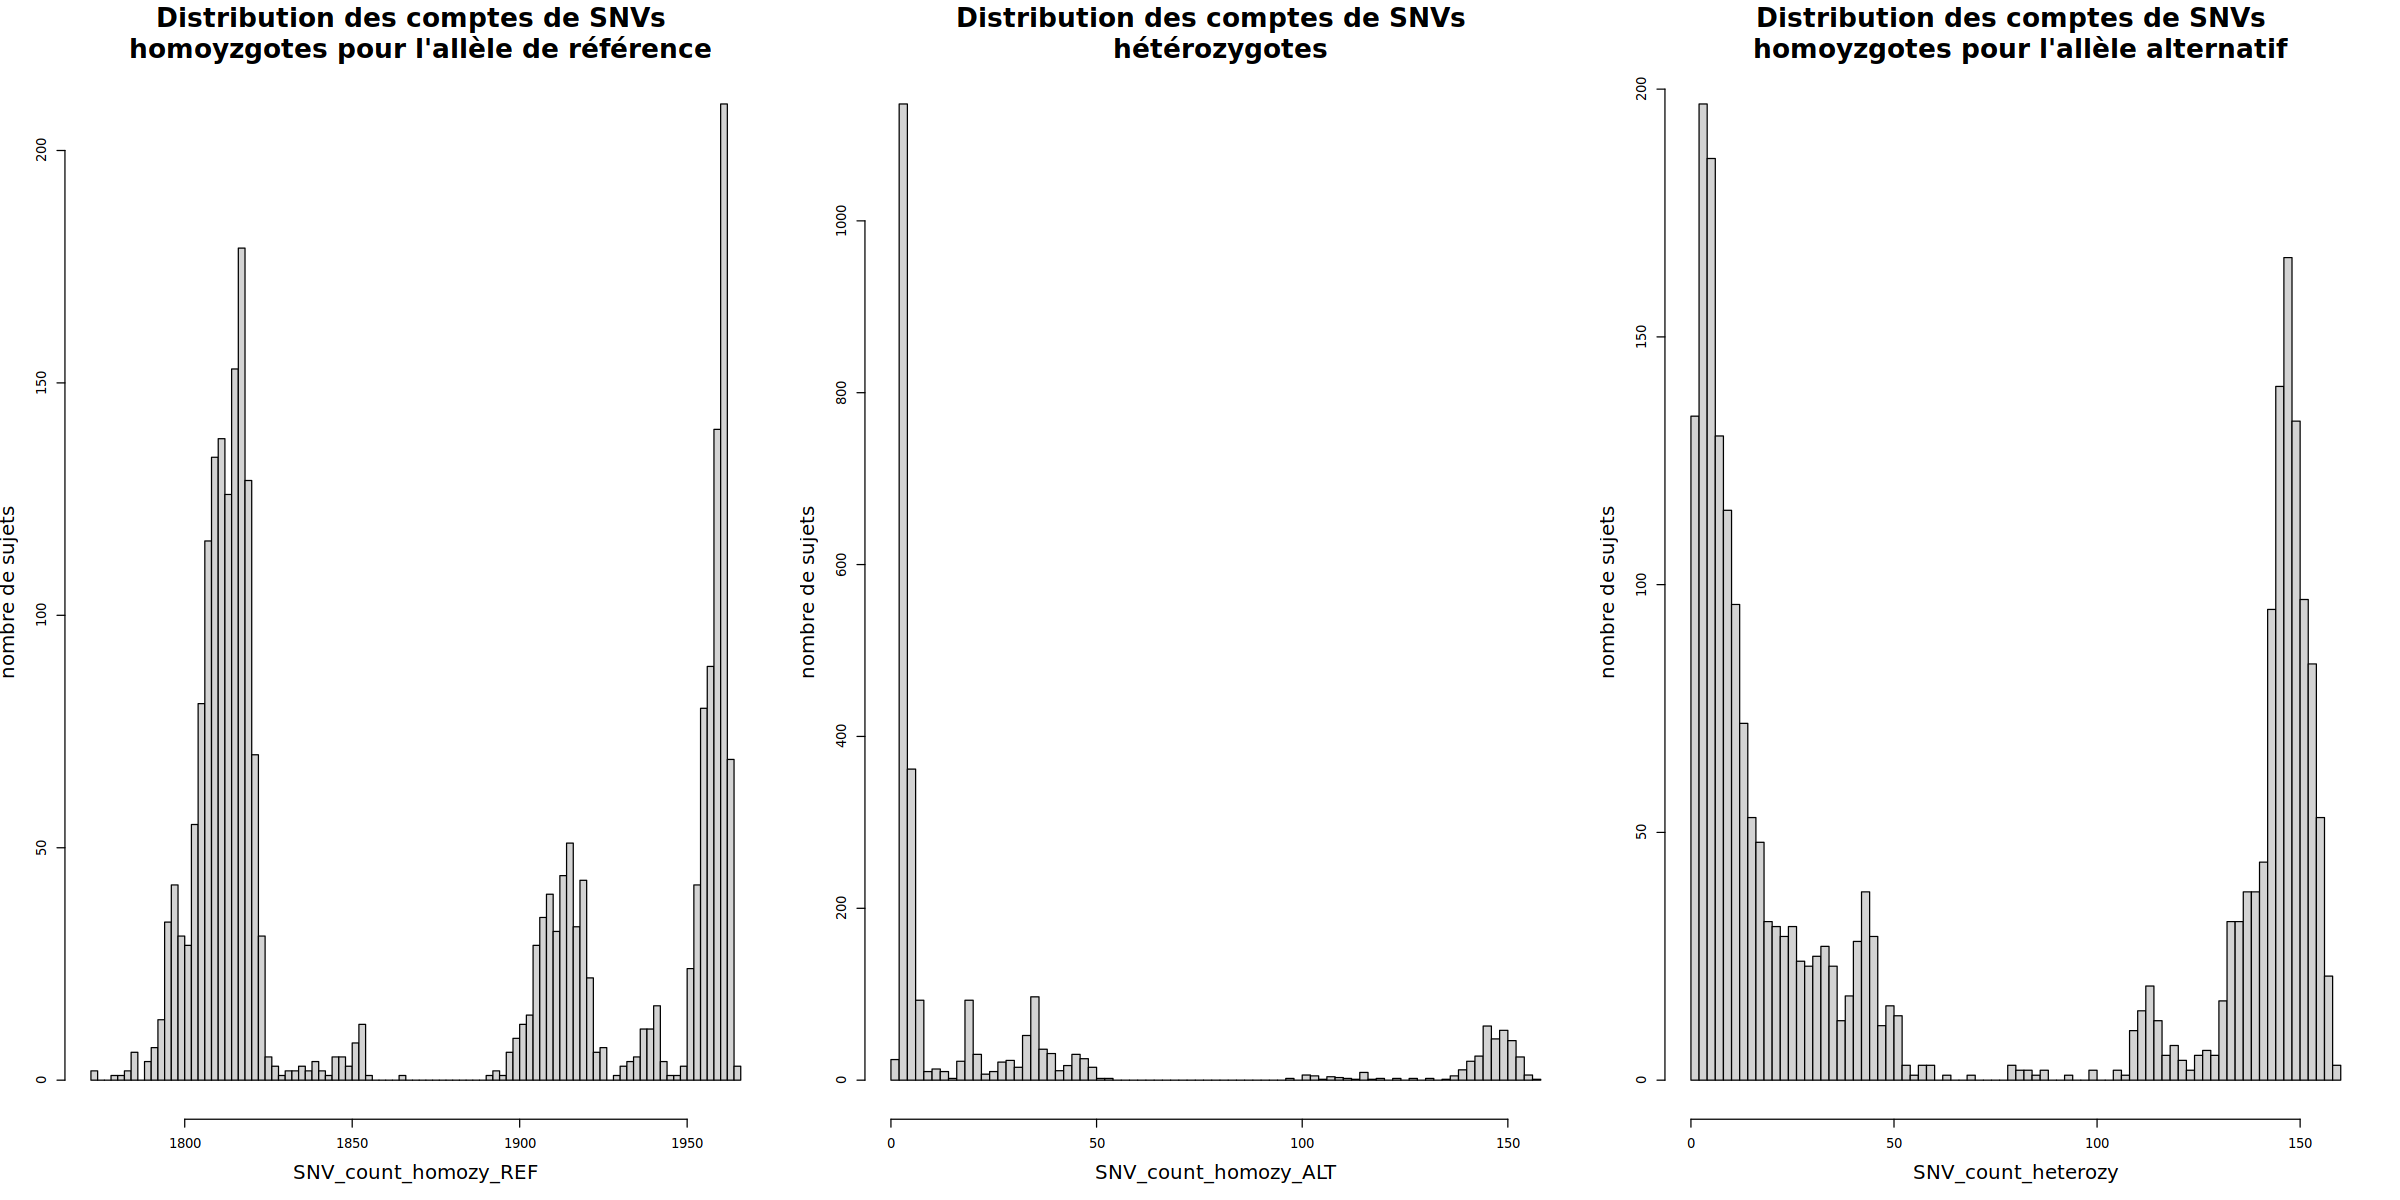

In [25]:
##### cell 25
options(repr.plot.width = 20, repr.plot.height = 10)
opar <- par()
par(mfrow = c(1, 3))
hist(SNV_count_homozy_REF,
     ylab = "nombre de sujets",
     freq = TRUE,
     breaks = 100,
     main = "Distribution des comptes de SNVs \n homoyzgotes pour l'allèle de référence",
     cex.lab = 1.5,
     cex.main = 2)
hist(SNV_count_homozy_ALT,
     ylab = "nombre de sujets",
     freq = TRUE,
     breaks = 100, 
     main = "Distribution des comptes de SNVs \n hétérozygotes",
     cex.lab = 1.5,
     cex.main = 2)
hist(SNV_count_heterozy,
     ylab = "nombre de sujets",
     freq = TRUE,
     breaks = 100, 
     main = "Distribution des comptes de SNVs \n homoyzgotes pour l'allèle alternatif",
     cex.lab = 1.5,
     cex.main = 2)
suppressWarnings(par(opar))

De même, on peut représenter les boxplots:

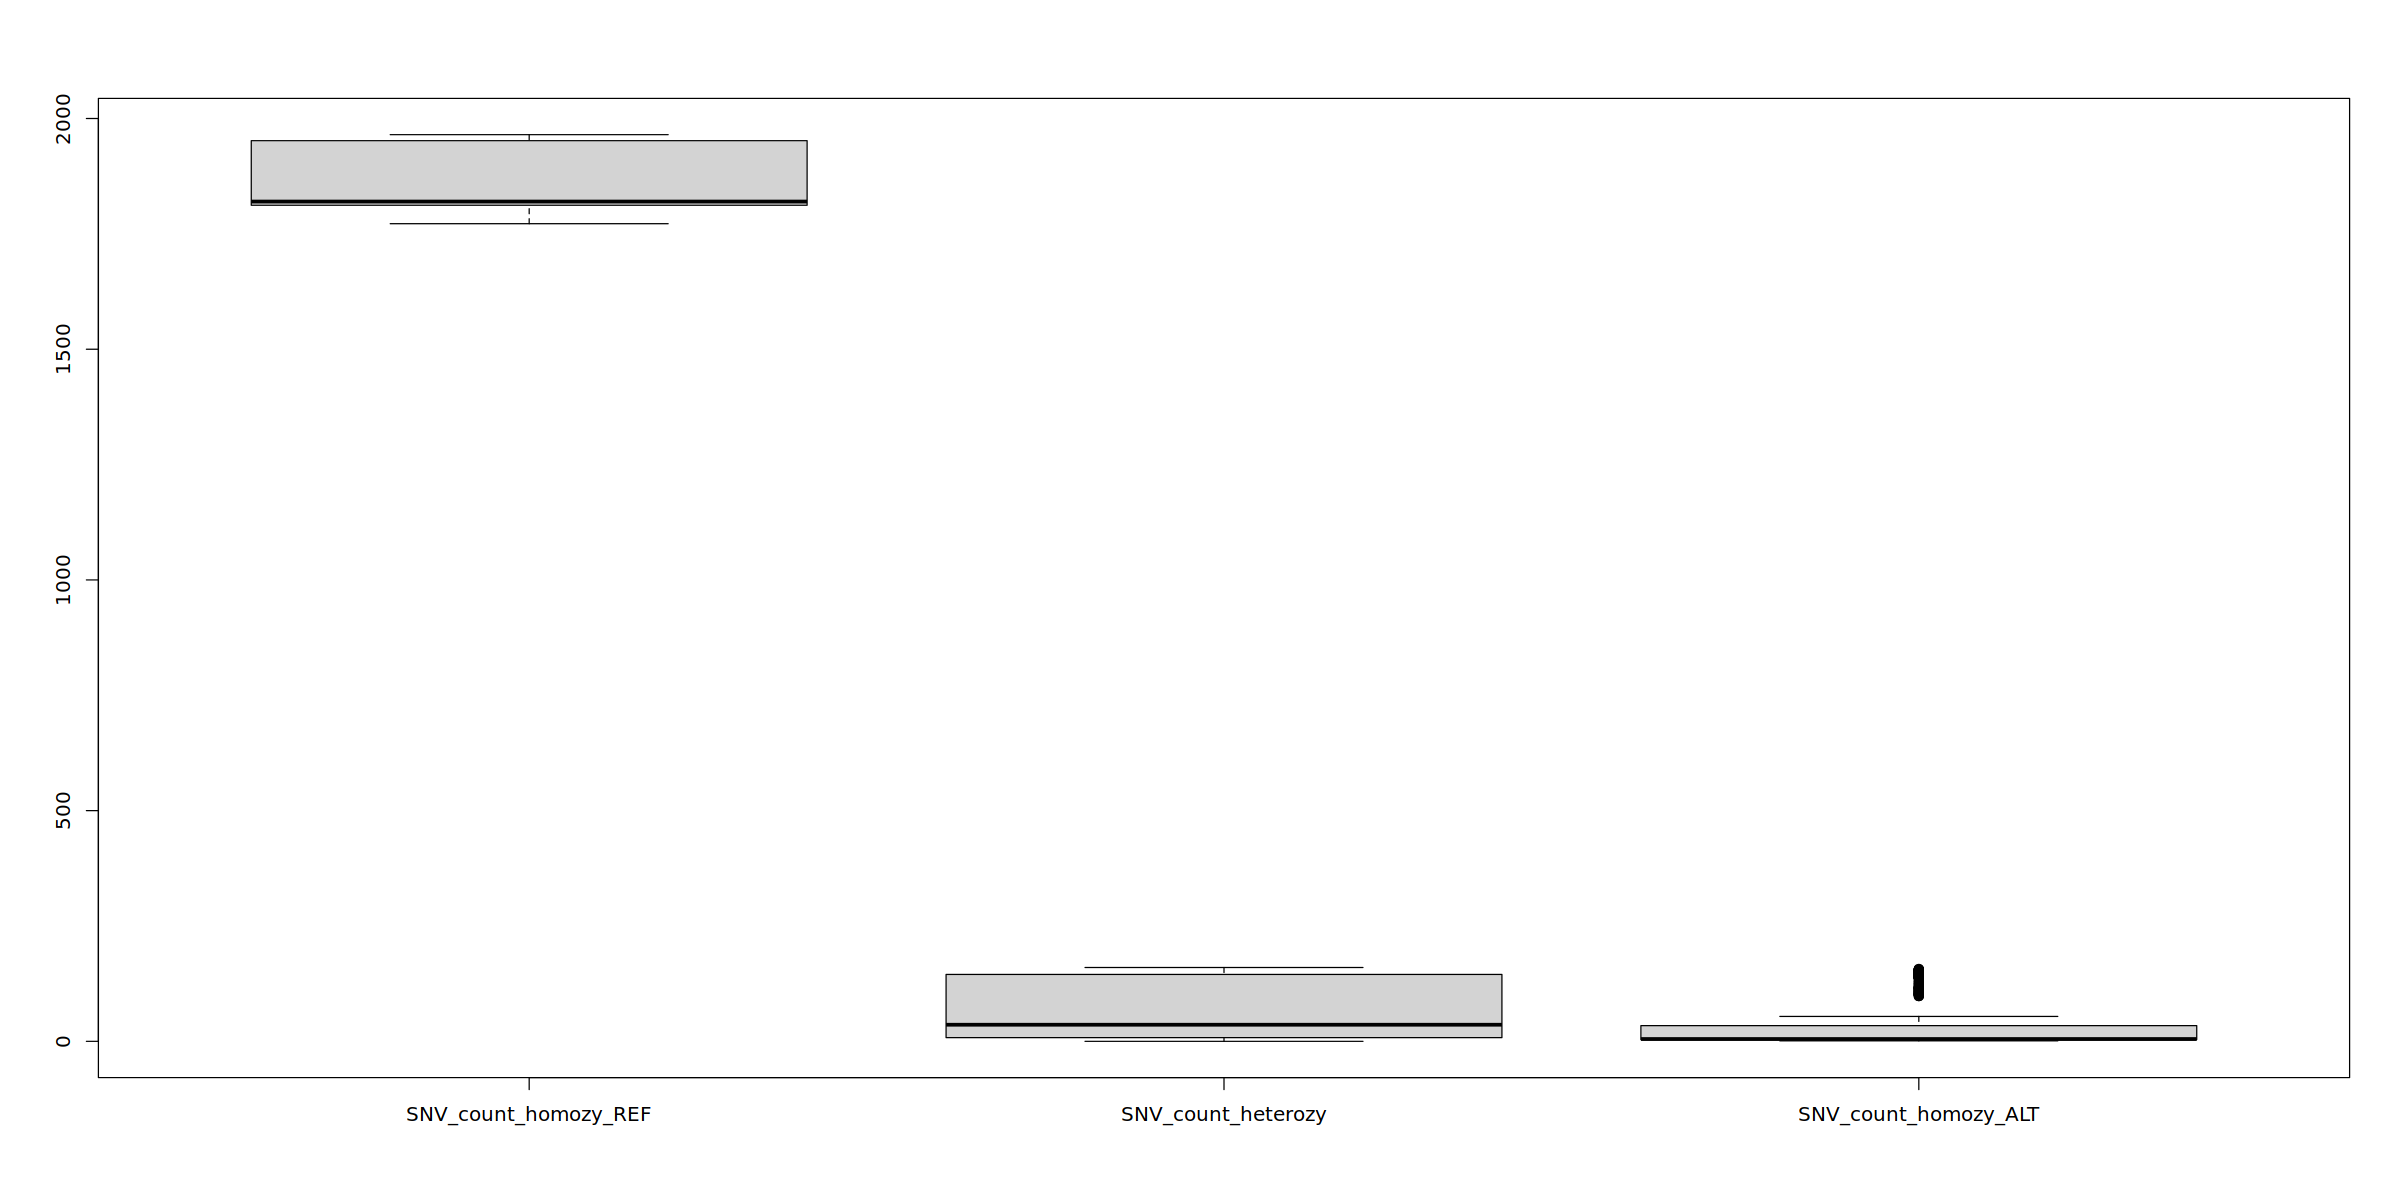

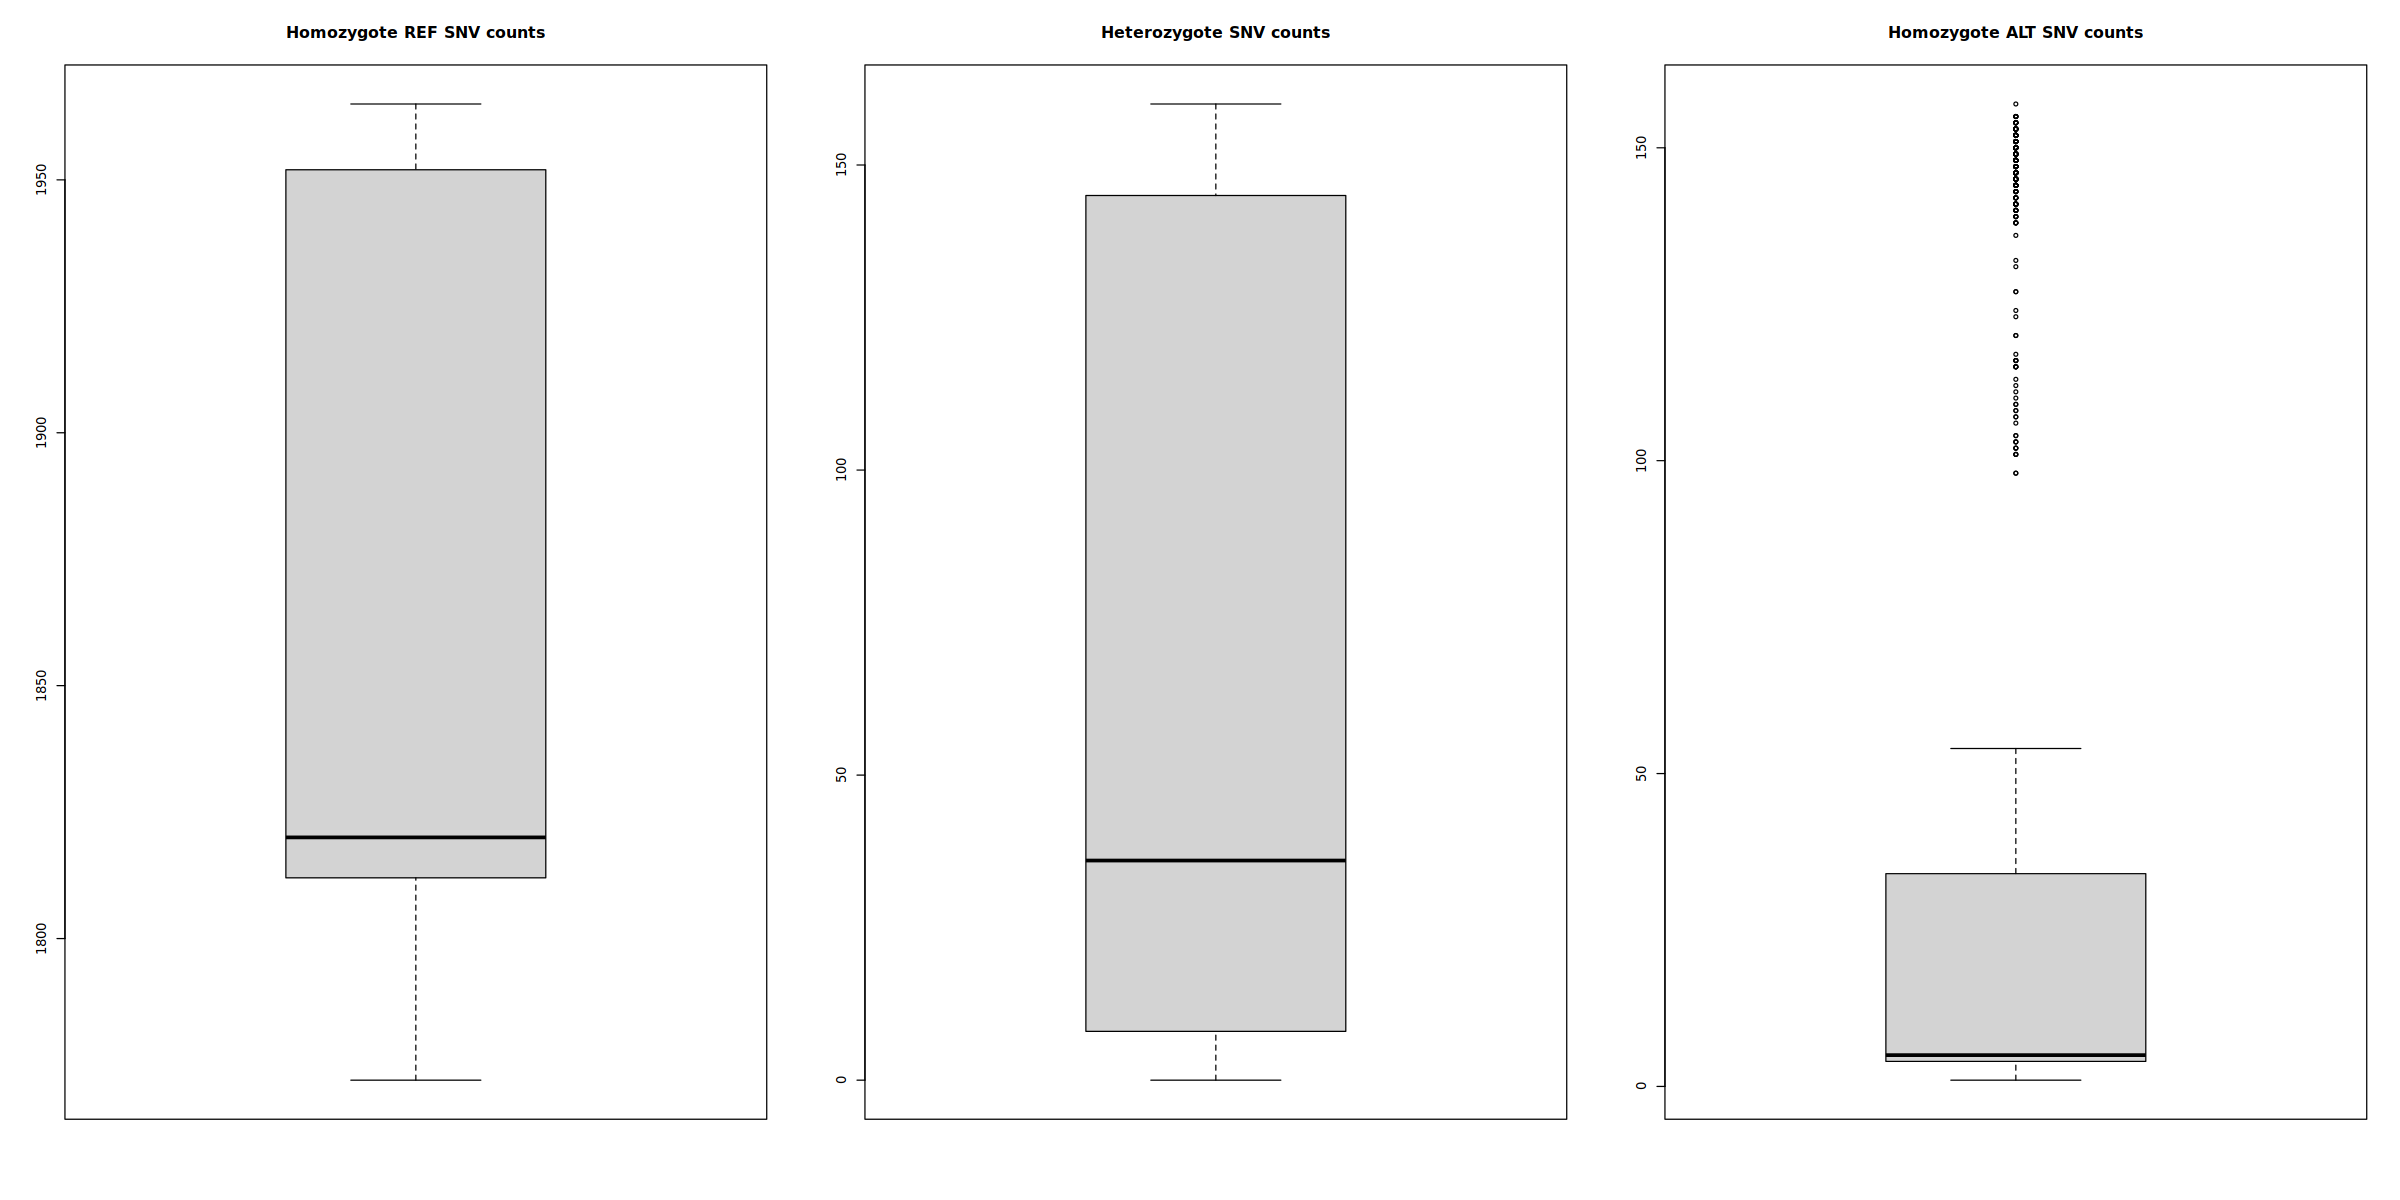

In [26]:
##### cell 26

options(repr.plot.width = 20, repr.plot.height = 10)
# On the same scale
boxplot(SNV_count_zygo_df)

# to each it's own
opar <- par()
par(mfrow = c(1, 3))
boxplot(SNV_count_zygo_df$SNV_count_homozy_REF,
        main = 'Homozygote REF SNV counts')

boxplot(SNV_count_zygo_df$SNV_count_heterozy,
        main = 'Heterozygote SNV counts')

boxplot(SNV_count_zygo_df$SNV_count_homozy_ALT,
        main = 'Homozygote ALT SNV counts')

suppressWarnings(par(opar))

Comme les 3 variables  ne sont pas indépendantes, on peut juste regarder la distribution des 2 dernières, donnant une indication plus claire du nombre moyen d'allèles alternatifs sur l'ensemble des sujets.

<div class="alert alert-warning"> 
    <b>Question 5) </b>:
    <br>
    &emsp;Complétez la commande suivante pour faire apparaître le boxplot <b>sans</b> la catégorie <code>SNV_count_homozy_REF</code>. Sur moodle, indiquez ce qui remplace XXX (pas toute la commande). Plusieurs écritures sont possibles.
</div>

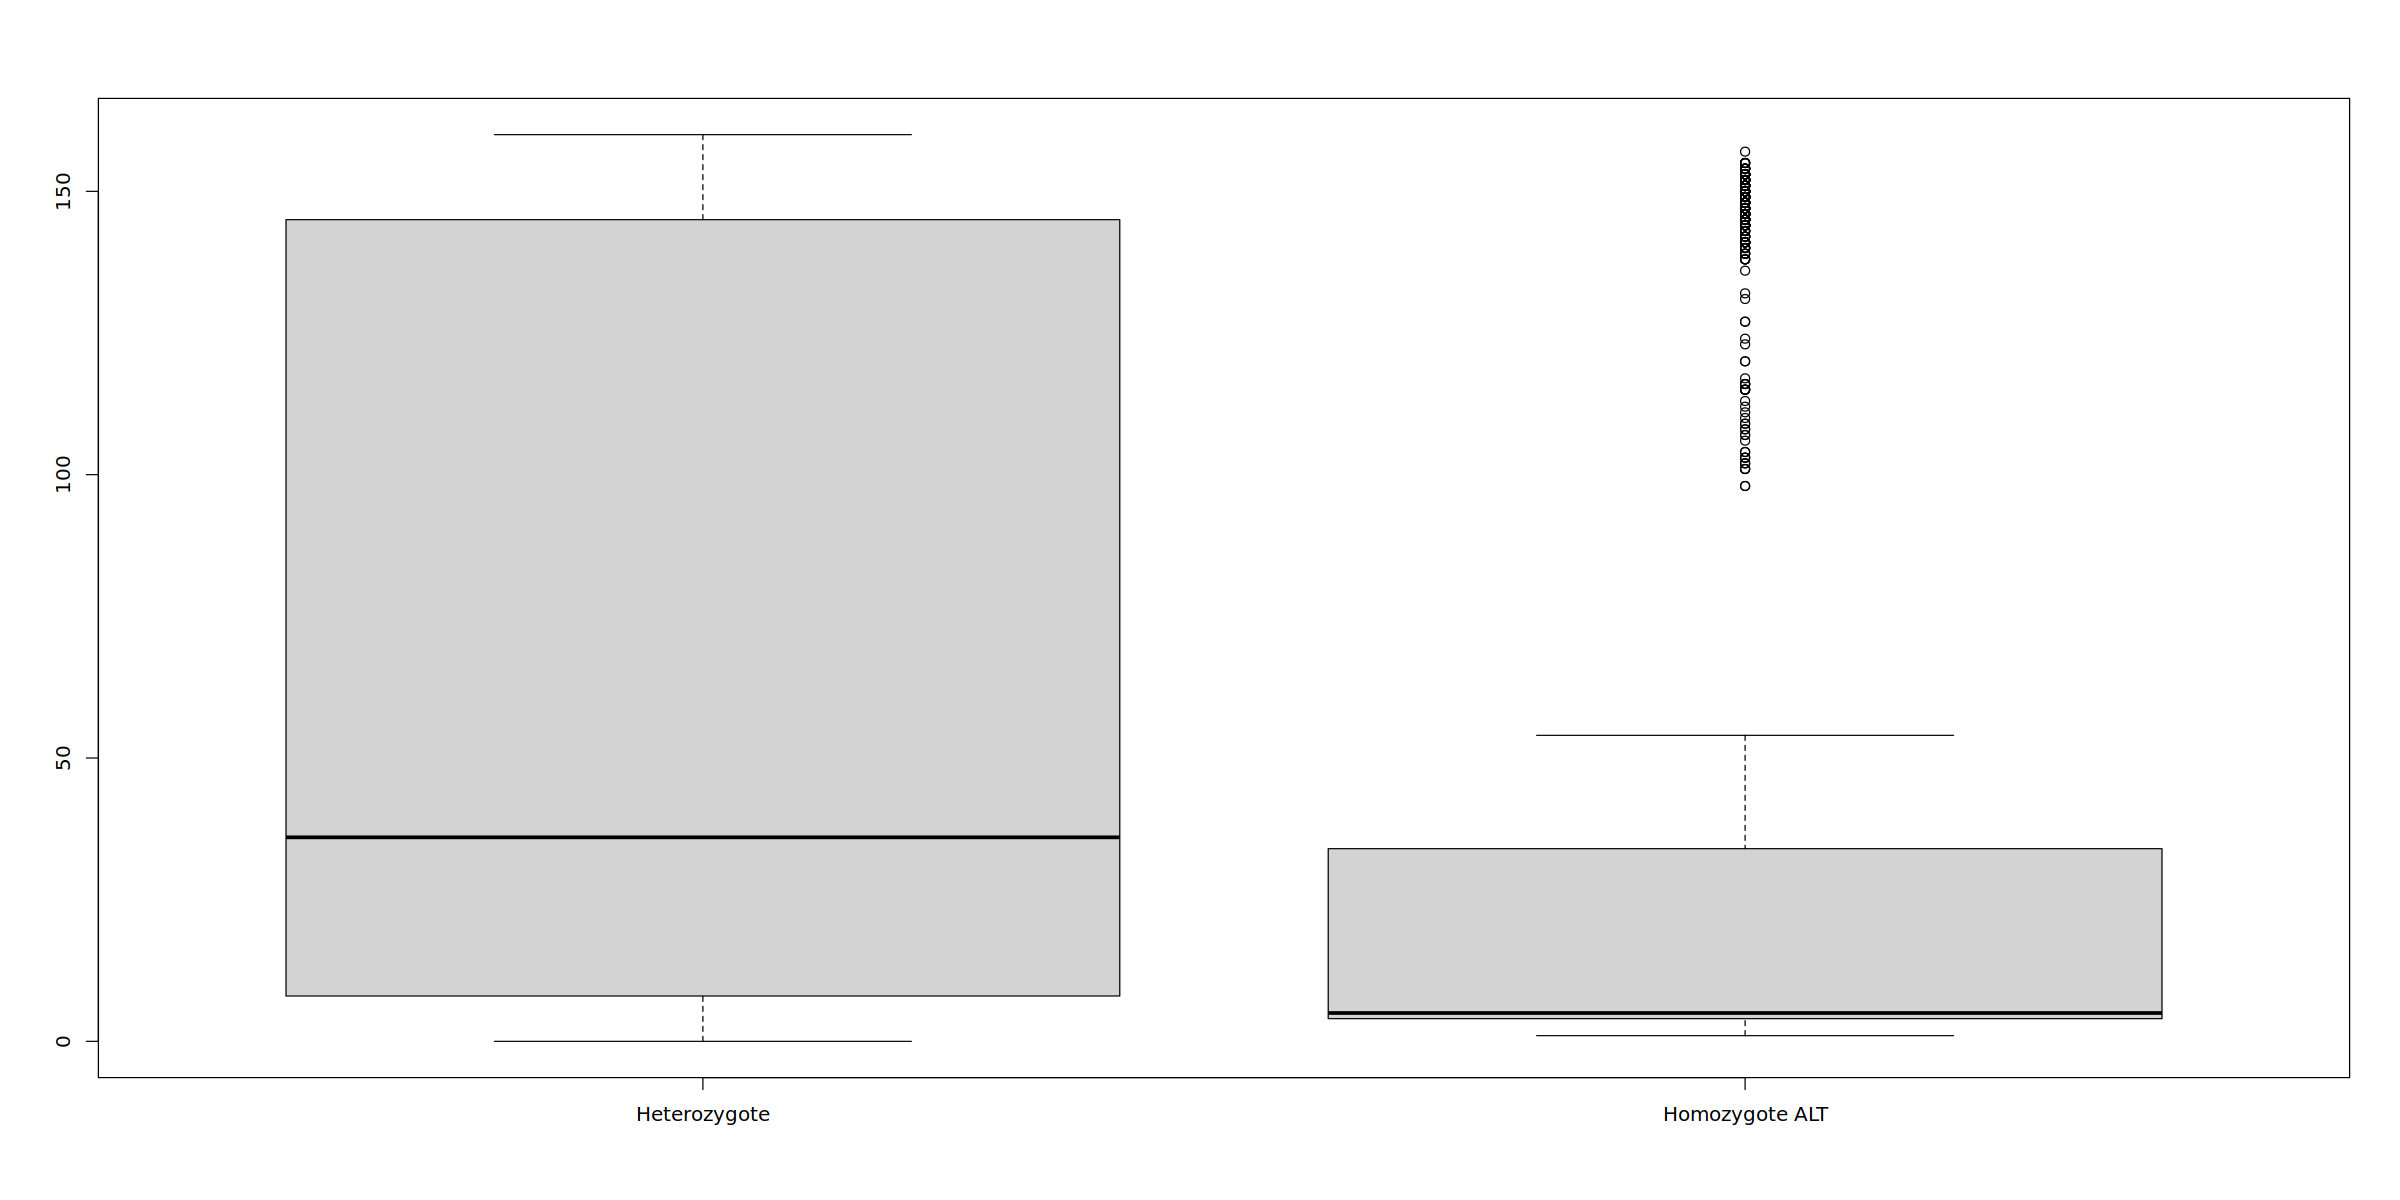

In [27]:
##### cell 27

# Without the homozy_ref, just heterozy and homozy_ALT
boxplot(SNV_count_zygo_df$SNV_count_heterozy,
        SNV_count_zygo_df[ , "SNV_count_homozy_ALT"], # XXX
        names = c('Heterozygote', 'Homozygote ALT')) 

On voit qu'en moyenne, il y a environ 70 variants hétérozygotes et 30 variants homozygotes. En génétique des populations, un pourcentage élevé de variants homozygotes peut indiquer la présence de populations consanguines. La distribution bimodale des comptes de variants homozygotes peut aussi suggérer qu'il y a des différences de populations parmi les sujets.

- Nous allons à présent compter les **effectifs de chaque type de génotype pour l'ensemble des individus par SNV** :

Cette fois-ci on applique la fonction `apply()` avec l'argument `MARGIN = 1` permettant d'appliquer une même fonction sur chaque colonne de l'objet X, ici générant une variable pour chaque génotype, contenant le comptes de sujets par SNV.

In [28]:
##### cell 28

# A quick peek at genotypes
#Overall
individual_count_homozy_REF <- apply( X = brca1_genotypes,
                    MARGIN = 1,
                    FUN = function(x) sum(x == 0)
                                     )
                                     
individual_count_heterozy <- apply(X = brca1_genotypes,
                  MARGIN = 1,
                  FUN = function(x) sum(x == 1)
                                   )
                  
individual_count_homozy_ALT <- apply(X = brca1_genotypes,
                    MARGIN = 1,
                    FUN = function(x) sum(x == 2)
                                     )
                    

Nous regroupons ces résultats dans un nouveau dataframe **individual_count_zygo_df**, avec chaque type de génotype dans une colonne comme une variable quantitative séparée. Chaque ligne correspond ici à un SNV.

In [29]:
##### cell 29
individual_count_zygo_df <- data.frame(individual_count_homozy_REF,
                                       individual_count_heterozy,
                                       individual_count_homozy_ALT)
str(individual_count_zygo_df)
head(individual_count_zygo_df)

'data.frame':	1969 obs. of  3 variables:
 $ individual_count_homozy_REF: int  2547 2548 2547 2544 2545 2547 2547 2545 2528 2547 ...
 $ individual_count_heterozy  : int  1 0 1 4 3 1 1 3 19 1 ...
 $ individual_count_homozy_ALT: int  0 0 0 0 0 0 0 0 1 0 ...


,individual_count_homozy_REF,individual_count_heterozy,individual_count_homozy_ALT
,<int>,<int>,<int>
1,2547,1,0
2,2548,0,0
3,2547,1,0
4,2544,4,0
5,2545,3,0
6,2547,1,0


A noter que pour chaque ligne, la somme des comptes (calculée avec la fonction `rowSums()`) donne le nombre d'individus, et que cette somme est la même pour chaque ligne comme l'indique le résumé ci-dessous.

In [30]:
##### cell 30
summary(rowSums(individual_count_zygo_df))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2548    2548    2548    2548    2548    2548 

Dans le dataframe `individual_count_zygo_df`, chaque colonne est une variable discrète. Elles sont non indépendantes car leur somme correspond au nombre de variants. Compte-tenu du nombre élevé d'observations possibles, on peut assimiler là encore ces variables discrètes à des variables variables quantitatives continues et explorer leur distribution.

 individual_count_homozy_REF individual_count_heterozy
 Min.   :   0                Min.   :   0.00          
 1st Qu.:2540                1st Qu.:   1.00          
 Median :2546                Median :   2.00          
 Mean   :2418                Mean   :  91.16          
 3rd Qu.:2547                3rd Qu.:   8.00          
 Max.   :2548                Max.   :1328.00          
 individual_count_homozy_ALT
 Min.   :   0.0             
 1st Qu.:   0.0             
 Median :   0.0             
 Mean   :  38.8             
 3rd Qu.:   0.0             
 Max.   :2548.0             

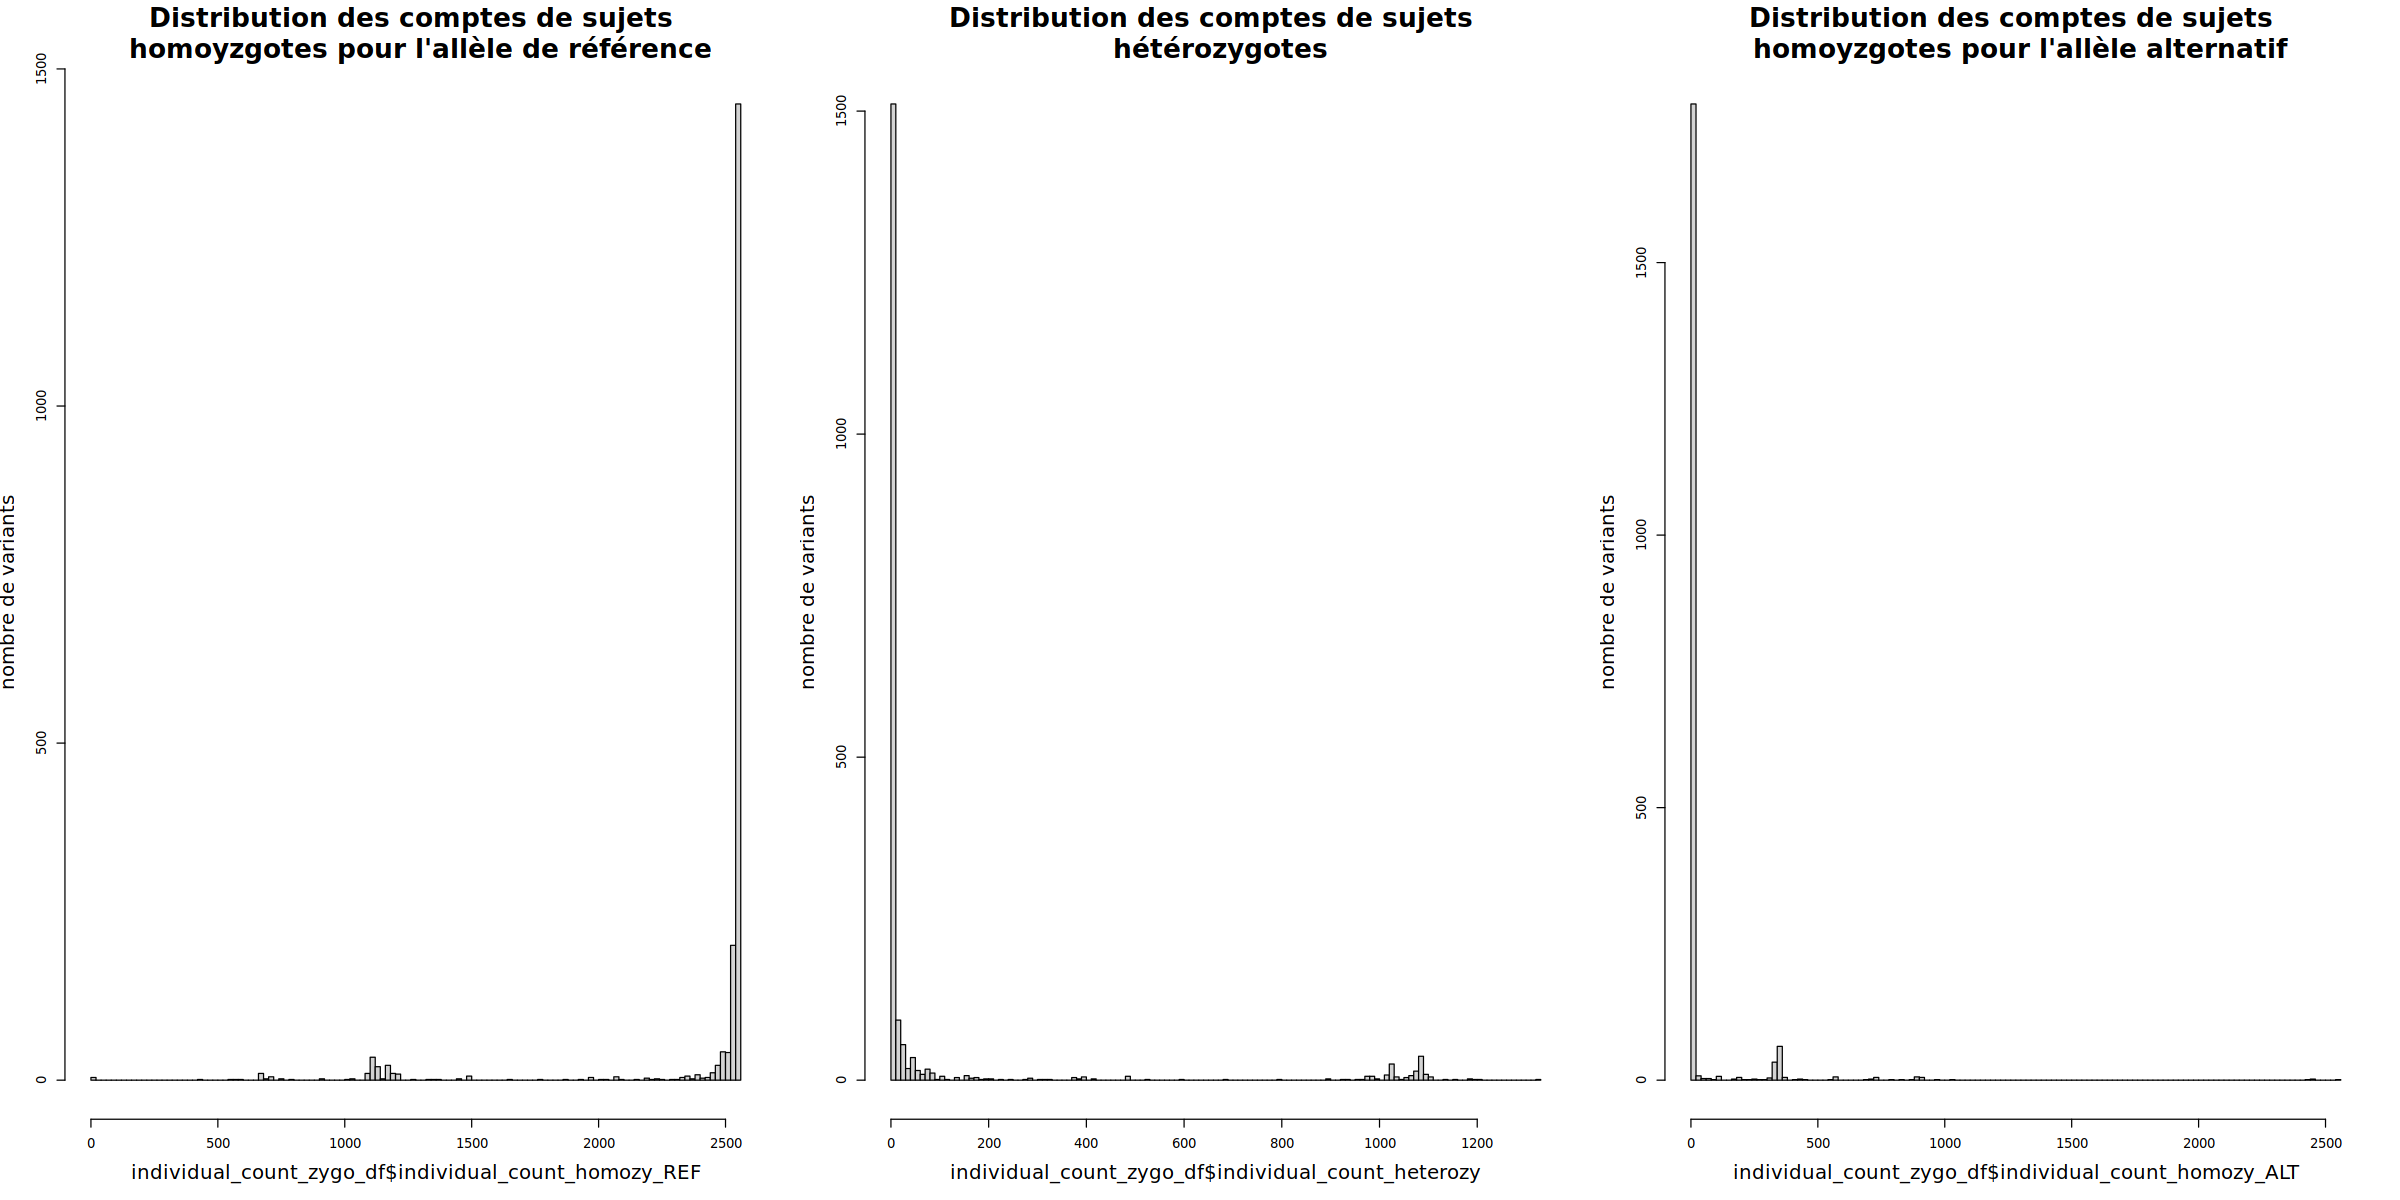

In [31]:
##### cell 31
summary(individual_count_zygo_df)

options(repr.plot.width = 20, repr.plot.height = 10)
opar <- par()
par(mfrow = c(1, 3))
hist(individual_count_zygo_df$individual_count_homozy_REF,
     ylab = "nombre de variants",
     freq = TRUE,
     breaks = 100,
     main = "Distribution des comptes de sujets \n homoyzgotes pour l'allèle de référence",
     cex.lab = 1.5,
     cex.main = 2)
hist(individual_count_zygo_df$individual_count_heterozy,
     ylab = "nombre de variants",
     freq = TRUE,
     breaks = 100, 
     main = "Distribution des comptes de sujets \n hétérozygotes",
     cex.lab = 1.5,
     cex.main = 2)
hist(individual_count_zygo_df$individual_count_homozy_ALT,
     ylab = "nombre de variants",
     freq = TRUE,
     breaks = 100, 
     main = "Distribution des comptes de sujets \n homoyzgotes pour l'allèle alternatif",
     cex.lab = 1.5,
     cex.main = 2)
suppressWarnings(par(opar))

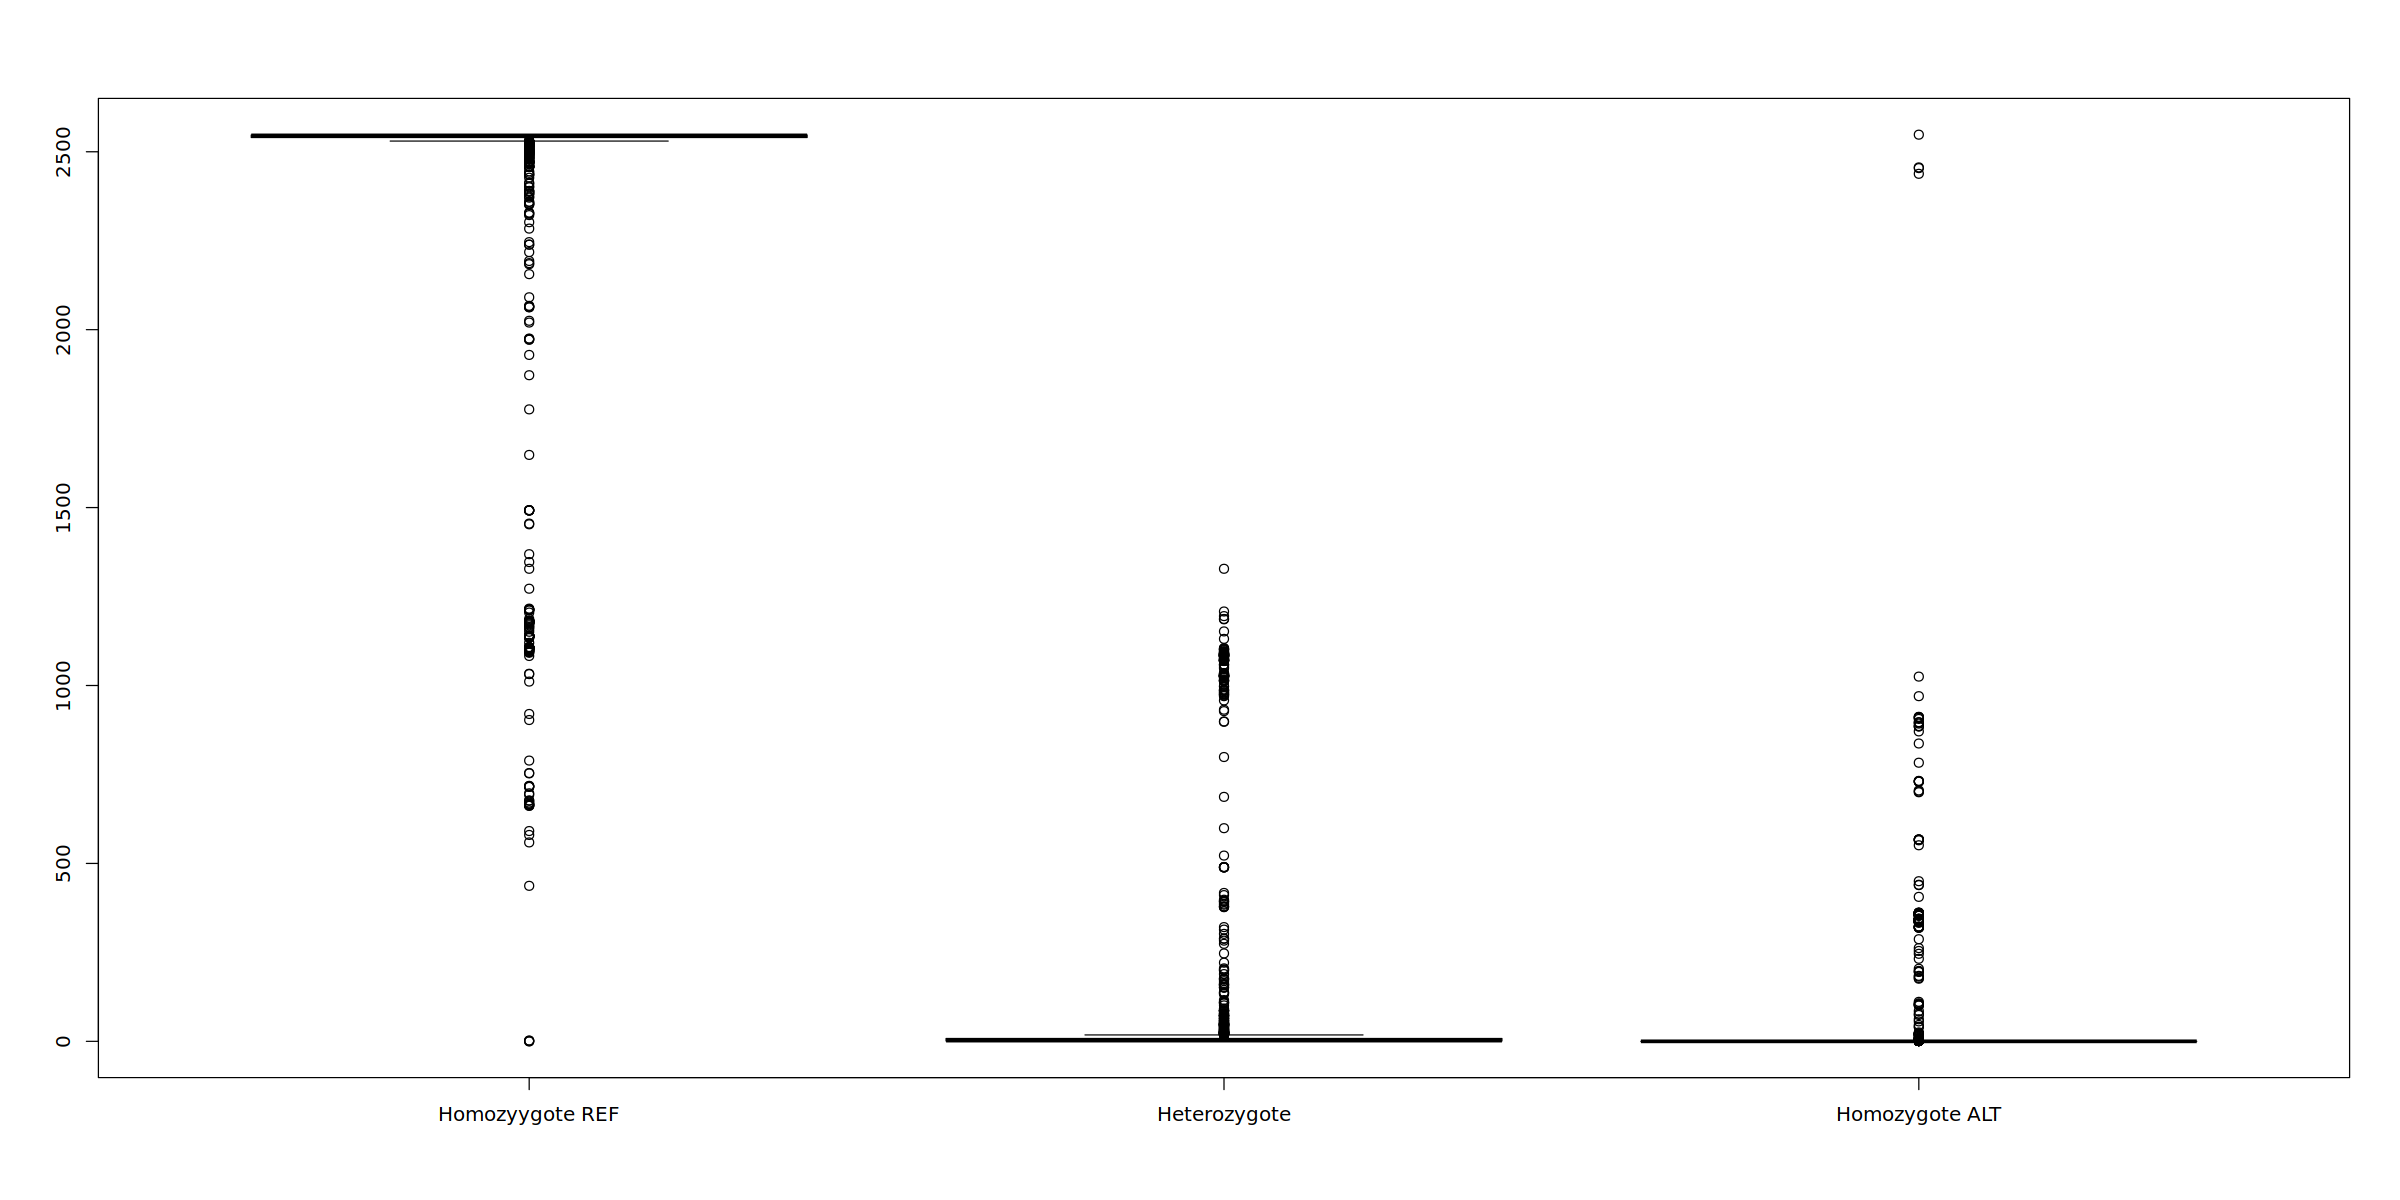

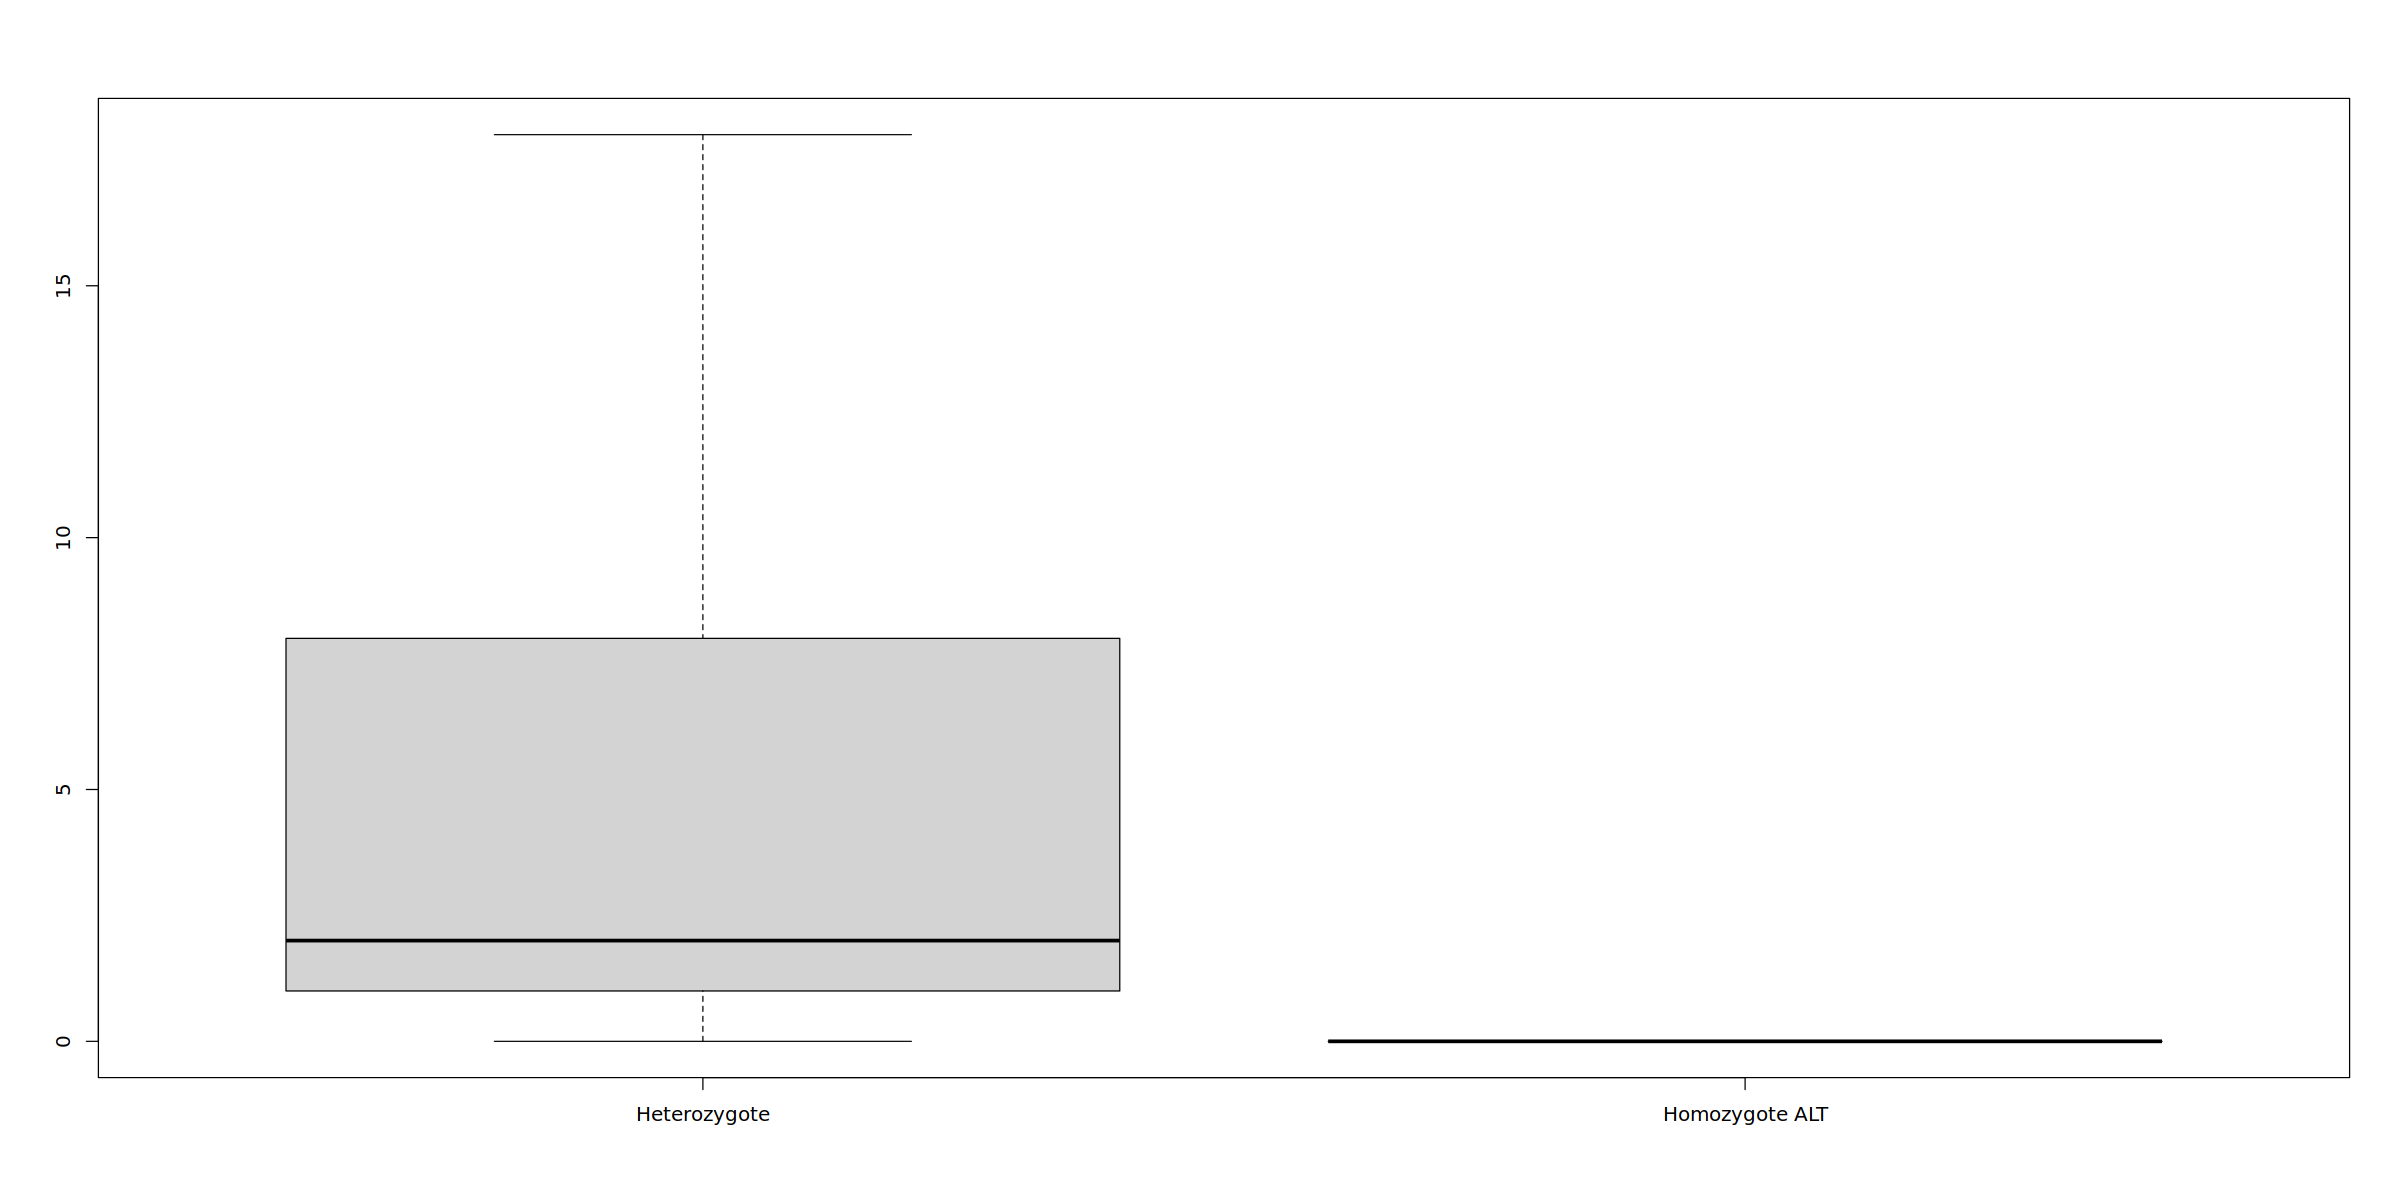

In [32]:
##### cell 32

# all types of genotypes
boxplot(individual_count_zygo_df,
        names = c('Homozyygote REF', 'Heterozygote', 'Homozygote ALT'),
        outline = TRUE)

# Without the homozy_ref, just heterozy and homozy_ALT, and without outliers
boxplot(individual_count_zygo_df[,-1],
        names = c('Heterozygote', 'Homozygote ALT'),
        outline = FALSE)

=> On observe globalement un faible nombre de variants présentant un allèle alternatif à l'état homozygote ou hétérozygote. Il existe cependant quelques valeurs aberrantes pour quelques variants potentiellement interessants. En génétique des populations, le **taux d'hétérozygotie** est un indicateur de l'informativité ou du degré de polymorphisme des variants. Il serait interessant de comparer ces catégories de variants en fonction de la fréquence de leur allèle mineur.

## IV. Pathogénicité des variants
---

### IV.A. Scores predictifs

Nous allons ici observer et comparer plusieurs scores prédictifs qui se proposent d'évaluer la pathogénicité d'un variant.
<br>
Nous avons choisi les scores suivants: 
- DANN (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4341060/)
- REVEL (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5065685/)
- VEST_4 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3665549/)
- CADD (https://cadd.gs.washington.edu/) qui est à ce jour la référence

Afin de comparer ces scores, qui sont des variables quantitatives continues, nous les représentons 2 à 2 sous forme d'un nuage de points et testons leur corrélation 2 à 2.

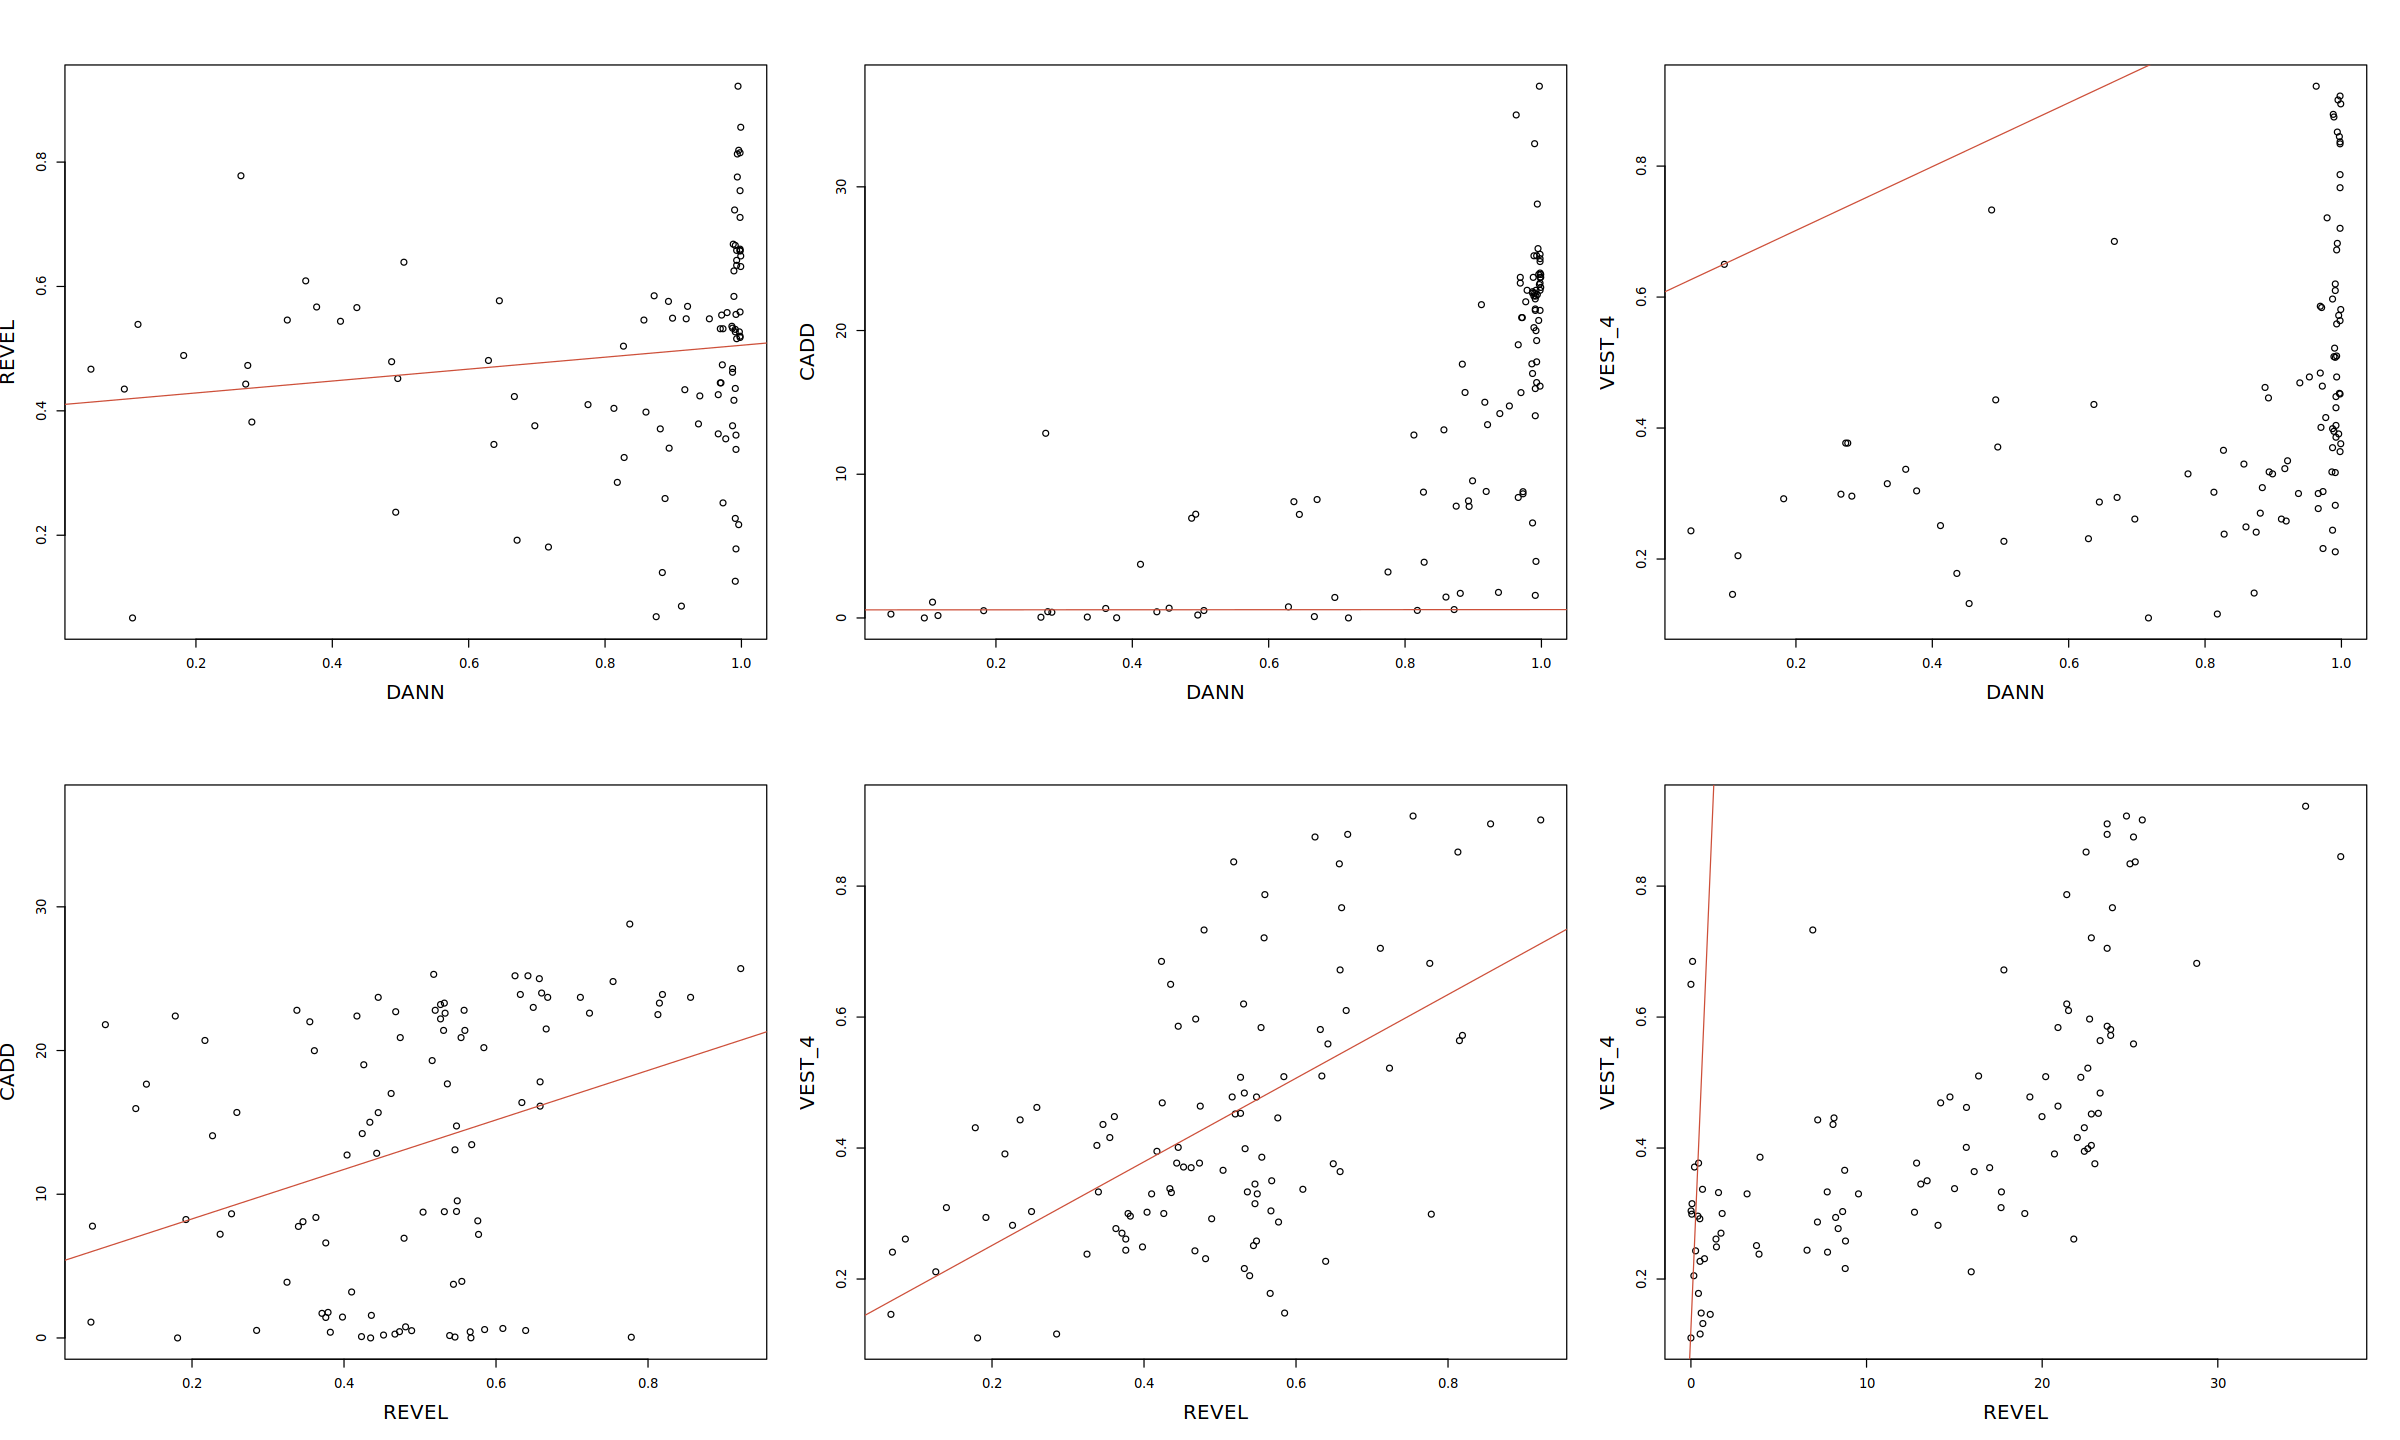

In [33]:
##### cell 33

options(repr.plot.width = 20, repr.plot.height = 12)
opar <- par()
par(mfrow = c(2, 3))

# Correlation
# between pathogeneicity scores:
plot(x = brca1_snps$DANN_score,
     y = brca1_snps$REVEL_score,
     xlab = "DANN",
     ylab = "REVEL",
     cex.lab = 1.5)
abline(lm(formula = REVEL_score ~ DANN_score, data = brca1_snps),
       col = 'tomato3')

plot(x = brca1_snps$DANN_score,
     y = brca1_snps$CADD_phred,
     xlab = "DANN",
     ylab = "CADD",
     cex.lab = 1.5)
abline(lm(formula = DANN_score ~ CADD_phred, data = brca1_snps), 
       col = 'tomato3')

plot(x = brca1_snps$DANN_score,
     y = brca1_snps$VEST4_score,
     xlab = "DANN",
     ylab = "VEST_4",
     cex.lab = 1.5)
abline(lm(formula = DANN_score ~ VEST4_score, data = brca1_snps),
       col = 'tomato3')

plot(x = brca1_snps$REVEL_score,
     y = brca1_snps$CADD_phred,
     xlab = "REVEL",
     ylab = "CADD",
     cex.lab = 1.5)
abline(lm(formula = CADD_phred ~ REVEL_score, data = brca1_snps),
       col = 'tomato3')

plot(x = brca1_snps$REVEL_score,
     y = brca1_snps$VEST4_score,
     xlab = "REVEL",
     ylab = "VEST_4",
     cex.lab = 1.5)
abline(lm(formula = VEST4_score ~ REVEL_score, data = brca1_snps), 
       col = 'tomato3')

plot(x = brca1_snps$CADD_phred,
     y = brca1_snps$VEST4_score,
     xlab = "REVEL",
     ylab = "VEST_4",
     cex.lab = 1.5)
abline(lm(formula = VEST4_score ~ REVEL_score, data = brca1_snps),
       col = 'tomato3')


suppressWarnings(par(opar))

In [34]:
##### cell 34

# Statistical testing:

cat("-----REVEL and DANN:\n")
cor.test(brca1_snps$REVEL_score, brca1_snps$DANN_score, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's

cat("\n-----CADD and DANN:\n")
cor.test(brca1_snps$CADD_phred, brca1_snps$DANN_score, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's

cat("\n-----VEST4 and DANN:\n")
cor.test(brca1_snps$VEST4_score, brca1_snps$DANN, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's

cat("-----CADD and REVEL:\n")
cor.test(brca1_snps$CADD_phred, brca1_snps$REVEL_score, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's

cat("\n-----VEST4 and REVEL:\n")
cor.test(brca1_snps$VEST4_score, brca1_snps$REVEL_score, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's

cat("\n-----VEST4 and CADD:\n")
cor.test(brca1_snps$VEST4_score, brca1_snps$CADD_phred, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's


-----REVEL and DANN:



	Pearson's product-moment correlation

data:  brca1_snps$REVEL_score and brca1_snps$DANN_score
t = 1.4353, df = 98, p-value = 0.1544
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05446799  0.33058638
sample estimates:
      cor 
0.1434852 



-----CADD and DANN:



	Pearson's product-moment correlation

data:  brca1_snps$CADD_phred and brca1_snps$DANN_score
t = 10.101, df = 102, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5957152 0.7919074
sample estimates:
      cor 
0.7071713 



-----VEST4 and DANN:



	Pearson's product-moment correlation

data:  brca1_snps$VEST4_score and brca1_snps$DANN
t = 4.164, df = 101, p-value = 6.595e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2043934 0.5365556
sample estimates:
      cor 
0.3827773 


-----CADD and REVEL:



	Pearson's product-moment correlation

data:  brca1_snps$CADD_phred and brca1_snps$REVEL_score
t = 3.4213, df = 98, p-value = 0.0009102
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1391597 0.4915309
sample estimates:
      cor 
0.3266494 



-----VEST4 and REVEL:



	Pearson's product-moment correlation

data:  brca1_snps$VEST4_score and brca1_snps$REVEL_score
t = 6.8442, df = 98, p-value = 6.727e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4190798 0.6882292
sample estimates:
      cor 
0.5686865 



-----VEST4 and CADD:



	Pearson's product-moment correlation

data:  brca1_snps$VEST4_score and brca1_snps$CADD_phred
t = 9.9572, df = 101, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5907639 0.7897743
sample estimates:
      cor 
0.7038224 


On pouvait aussi générer directement la matrice des coefficients de corrélation 2 à 2 et les valeurs p, ainsi que des représentations graphiques avec les fonctions suivantes.

,REVEL_score,DANN_score,CADD_phred,VEST4_score
REVEL_score,1.0000000,0.1434852,0.3266494,0.5686865
DANN_score,0.1434852,1.0000000,0.7180924,0.3628555
CADD_phred,0.3266494,0.7180924,1.0000000,0.6659645
VEST4_score,0.5686865,0.3628555,0.6659645,1.0000000


corrplot 0.92 loaded



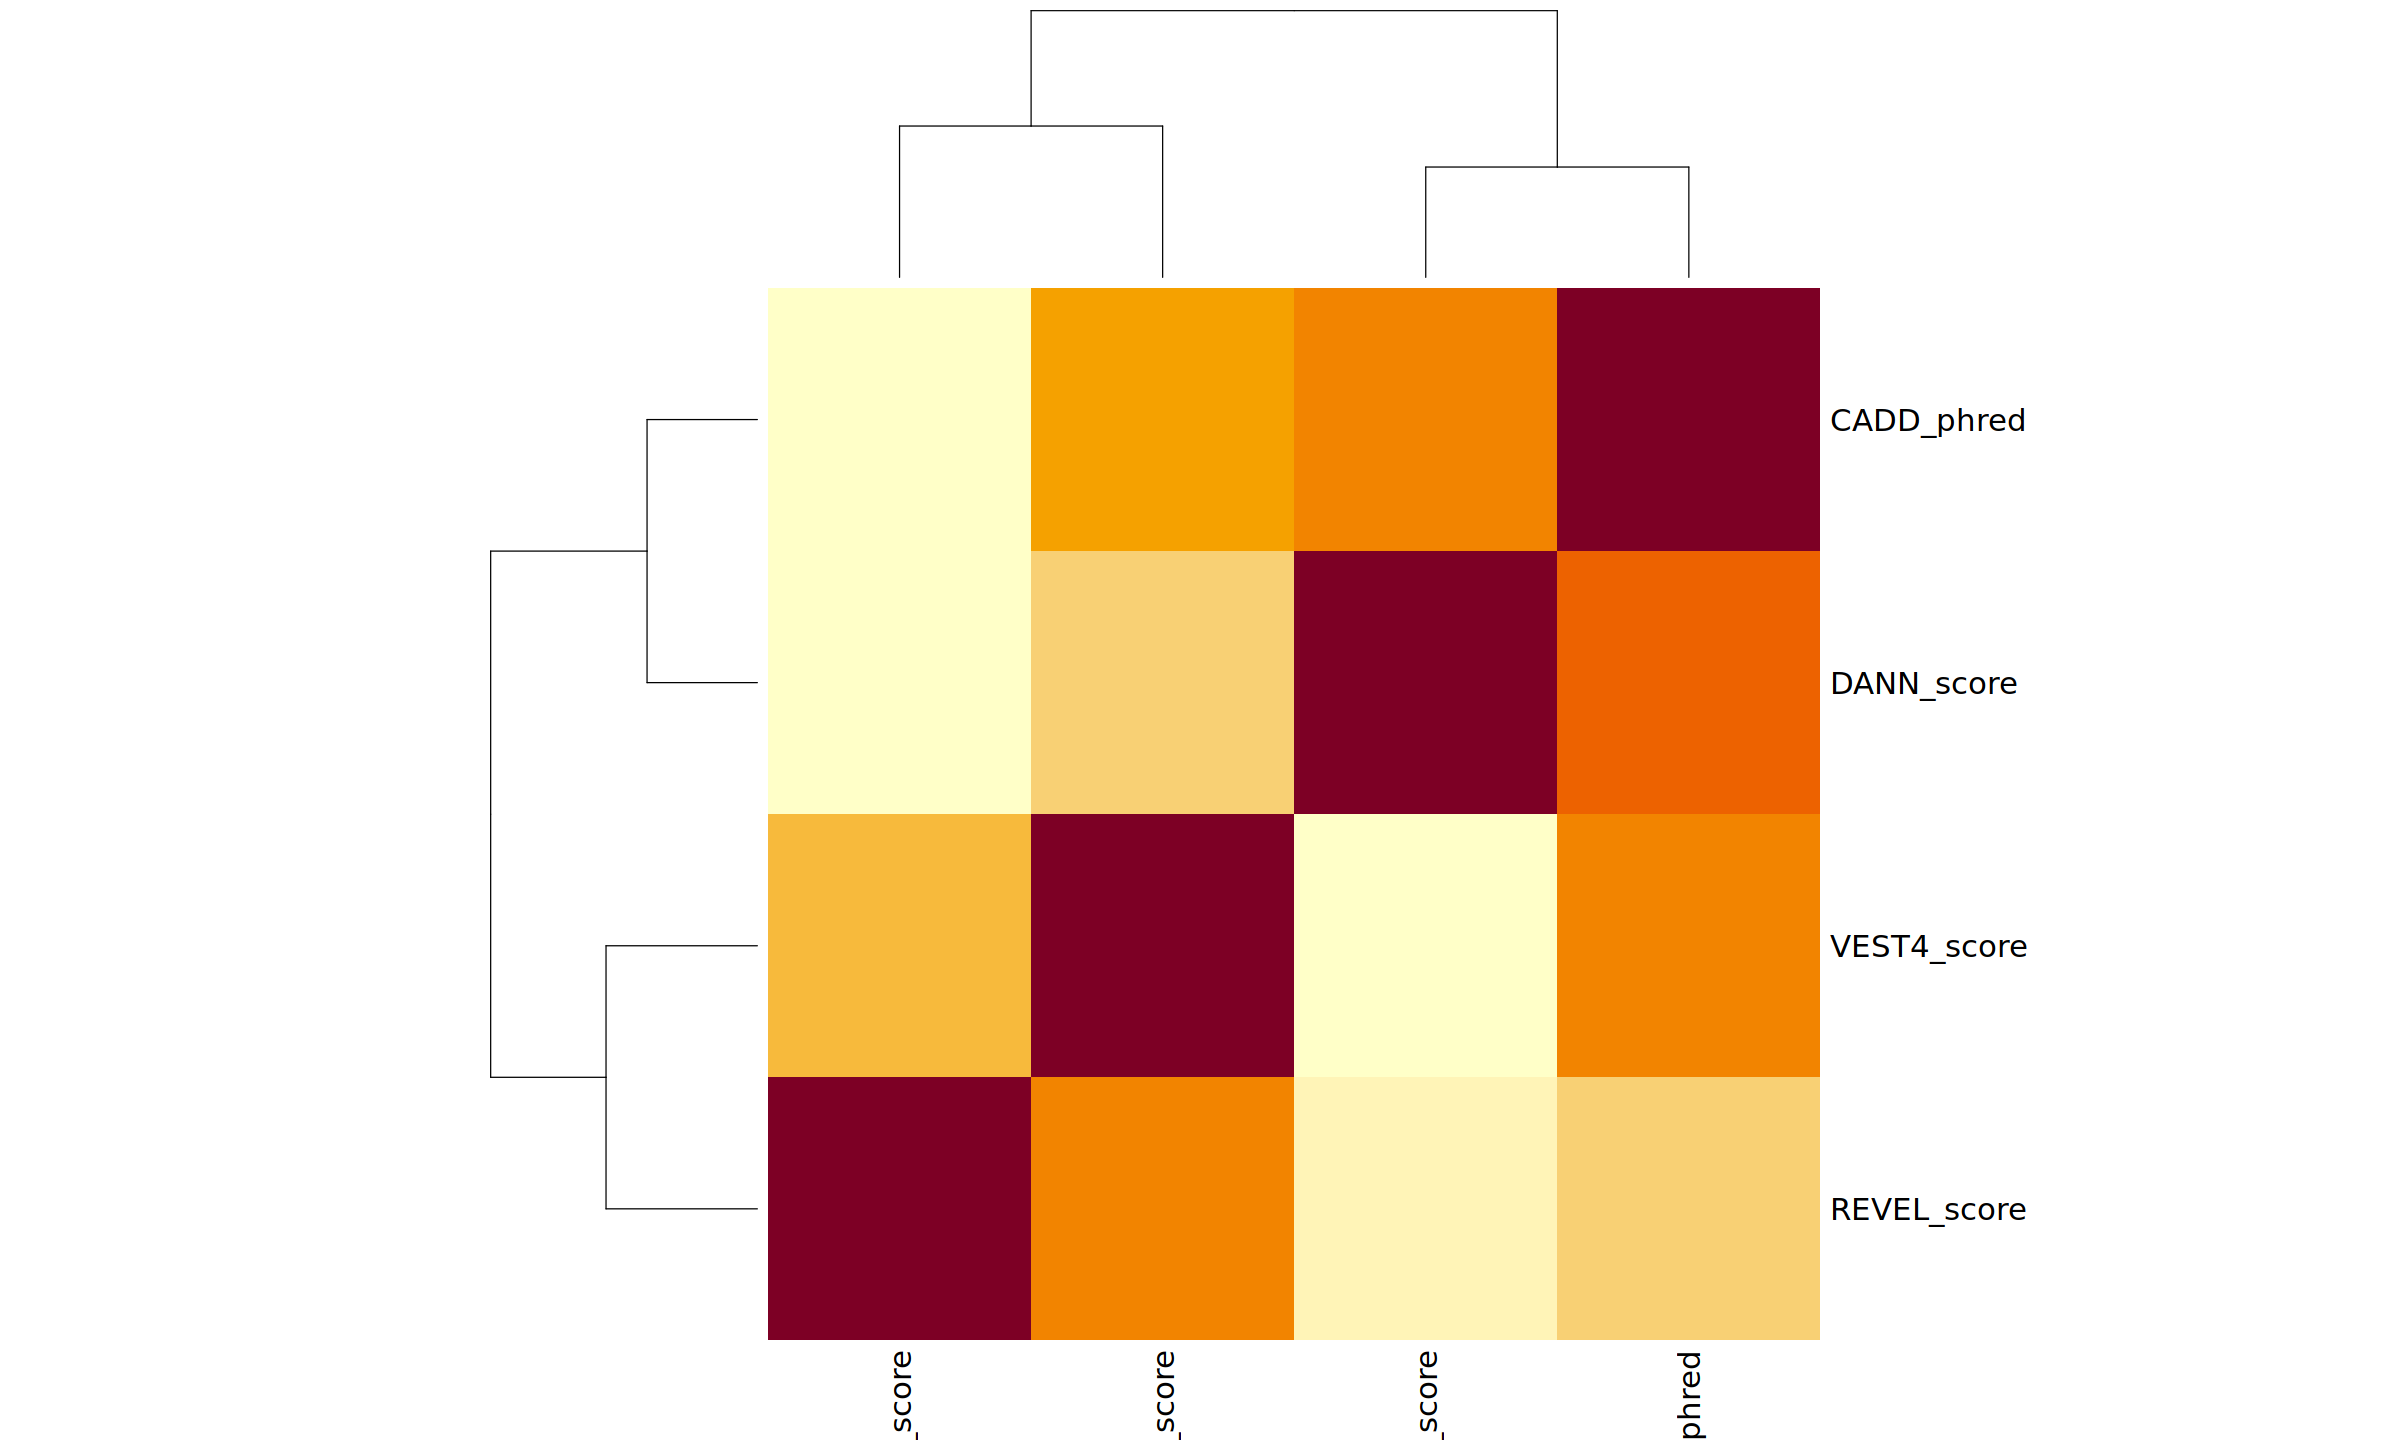

$r
            DANN_score CADD_phred REVEL_score VEST4_score
DANN_score           1                                   
CADD_phred        0.72          1                        
REVEL_score       0.14       0.33           1            
VEST4_score       0.36       0.67        0.57           1

$p
            DANN_score CADD_phred REVEL_score VEST4_score
DANN_score           0                                   
CADD_phred     4.9e-17          0                        
REVEL_score       0.15    0.00091           0            
VEST4_score    6.6e-05    1.1e-16     6.7e-10           0

$sym
            DANN_score CADD_phred REVEL_score VEST4_score
DANN_score  1                                            
CADD_phred  ,          1                                 
REVEL_score            .          1                      
VEST4_score .          ,          .           1          
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1


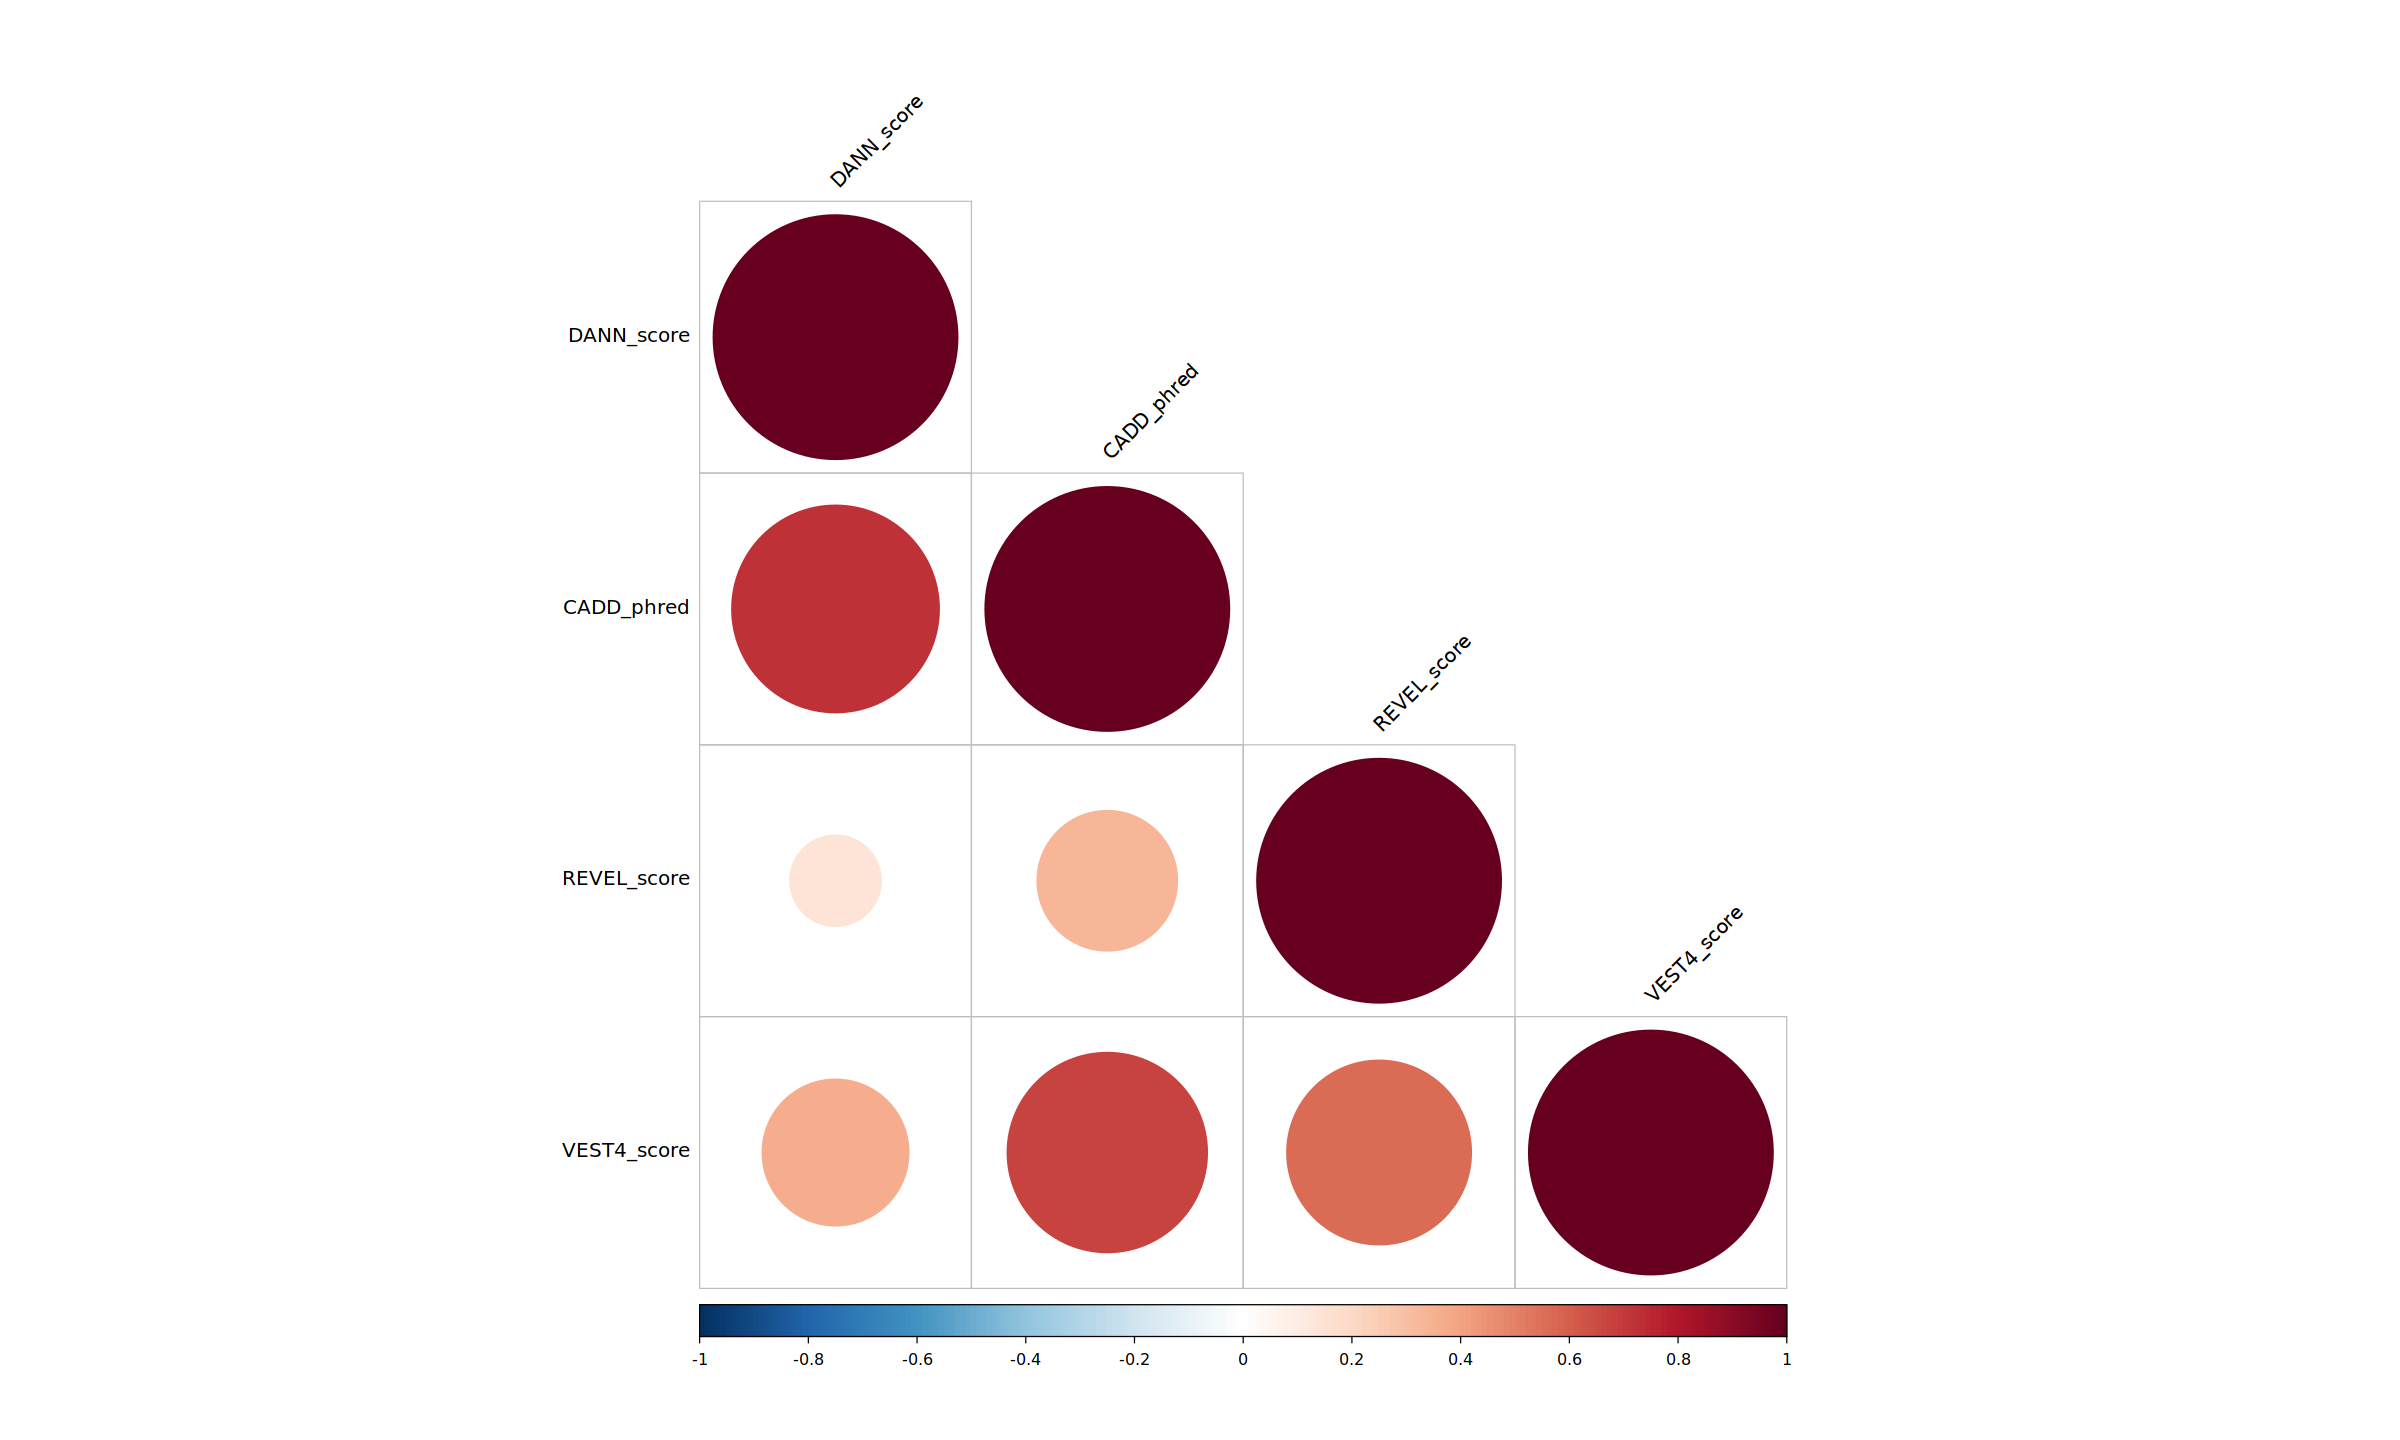

In [35]:
##### cell 35

# generate pairwise correlation coeffifients of a matrix
cor(brca1_snps[,c("REVEL_score", "DANN_score", "CADD_phred", "VEST4_score")],
    method = 'pearson',
   use = 'complete.obs')

# draw a heatmap of the pairwise correlation matrix
heatmap(cor(brca1_snps[,c("REVEL_score", "DANN_score", "CADD_phred", "VEST4_score")],
    method = 'pearson',
   use = 'complete.obs'))

# do all in one: matrix of correlation coefficients, matrix of pvalues, correlograme
source("http://www.sthda.com/upload/rquery_cormat.r")
options(width = 200)
rquery.cormat(brca1_snps[,c("REVEL_score", "DANN_score", "CADD_phred", "VEST4_score")])




<div class="alert alert-warning"> 
    <b>Question 6) </b>:
    <br>
    &emsp;Commentez brièvement (un court paragraphe) les résultats des <i>cells</i> 33 à 35 et expliquez si ils représentent selon vous un problème.
</div>

### IV.B. Introns, exons et pathogénicité

Les analyses suivantes visent à déterminer s'il existe une différence de pathogénicité pour les variants de _BRCA1_ selon leur localisation dans les exons ou dans les introns.

- distribution des SNVs selon leur position dans le gène:


downstream     exonic   intronic   splicing       UTR3       UTR5       <NA> 
        25        151       1744          3         33         13          0 

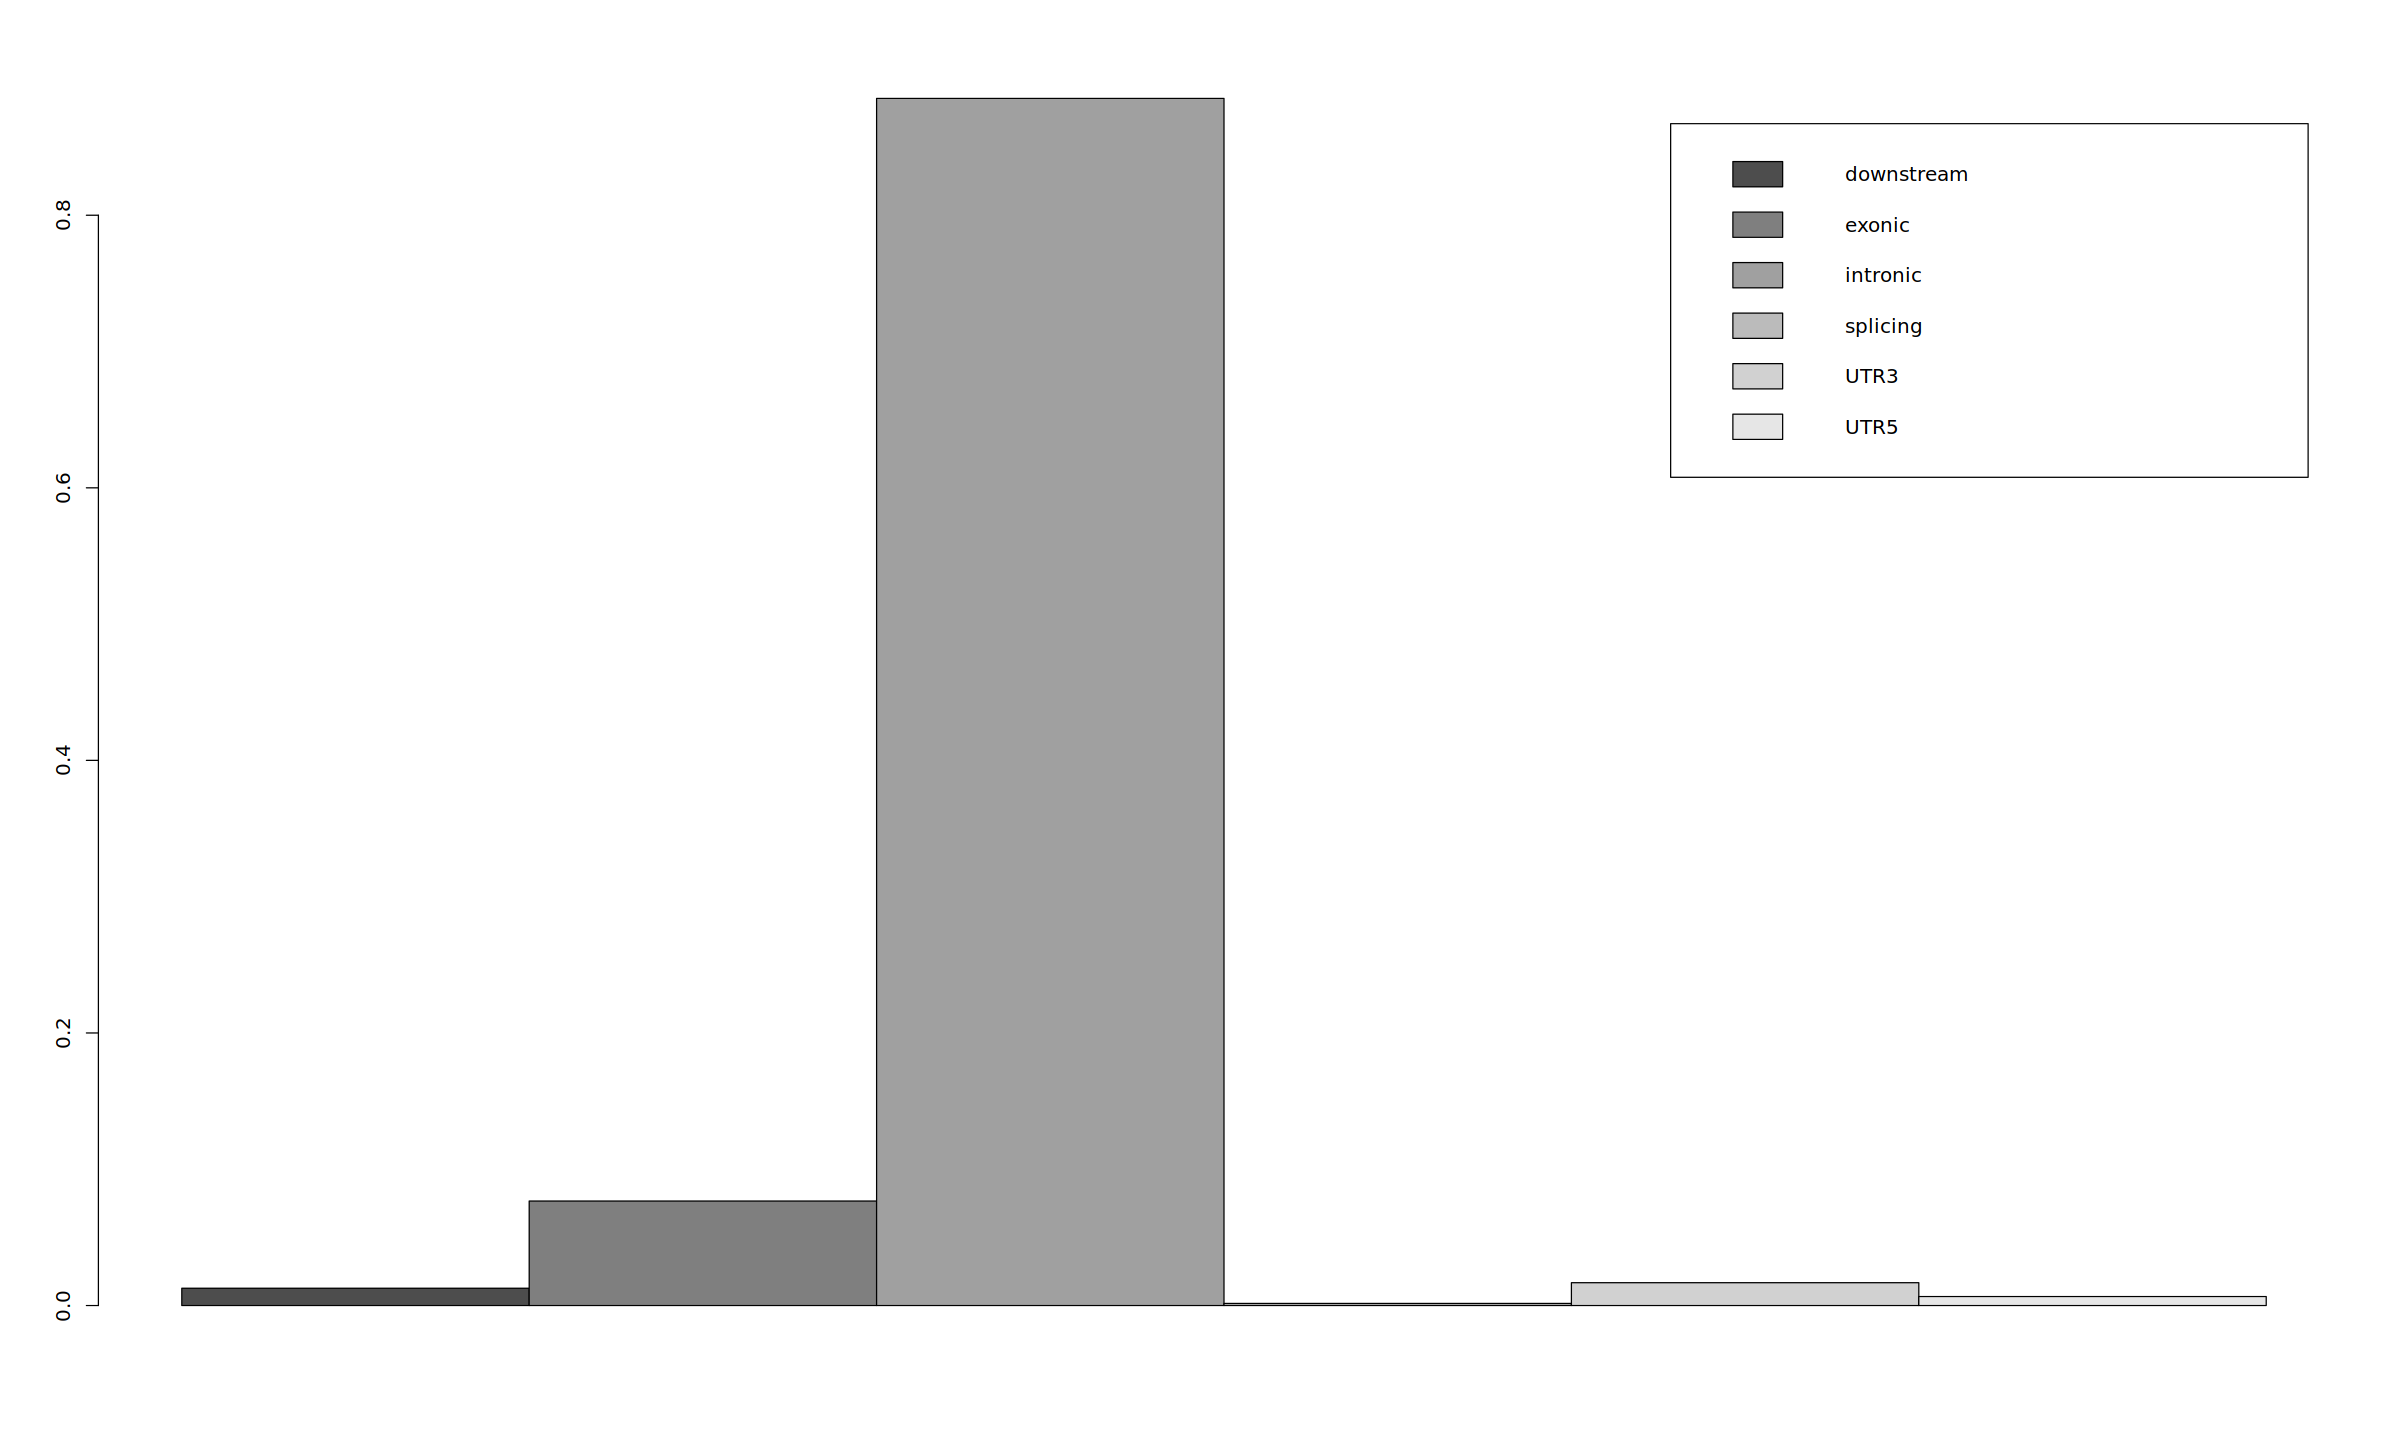

In [36]:
##### cell 36

# Subsetting and comparing exonic and intronic patho scores
table(brca1_snps$Func.refGene, useNA = "always")
barplot(proportions (as.matrix(table(brca1_snps$Func.refGene)), 2),
    beside = TRUE,
        legend = sort(unique(brca1_snps$Func.refGene)))

- étude de la pathogénicité selon le score DANN selon la position exonique ou intronique:

<div class="alert alert-warning"> 
    <b>Question 7) </b>:
    <br>
    &emsp;Complétez la <i>cell</i> 37 pour connaitre le nombre de données manquantes pour le score CADD  dans la catégorie <code>is_intronic</code>.
</div>

In [37]:
##### cell 37

# the next two commands return TRUE or FALSE depending on the result of the test
is_exonic <- brca1_snps$Func.refGene == 'exonic'
is_intronic <- brca1_snps$Func.refGene == 'intronic'

# we can use is.na() to count the TRUEs and sum them
sum(is.na(brca1_snps$CADD_phred[which(is_exonic)]))
sum(is.na(brca1_snps$CADD_phred[which(is_intronic)])) # #sum(is.na(XXX))


[1] 49

[1] 1743

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.001   3.770  15.345  13.695  22.575  37.000      49 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.68    0.68    0.68    0.68    0.68    0.68    1743 

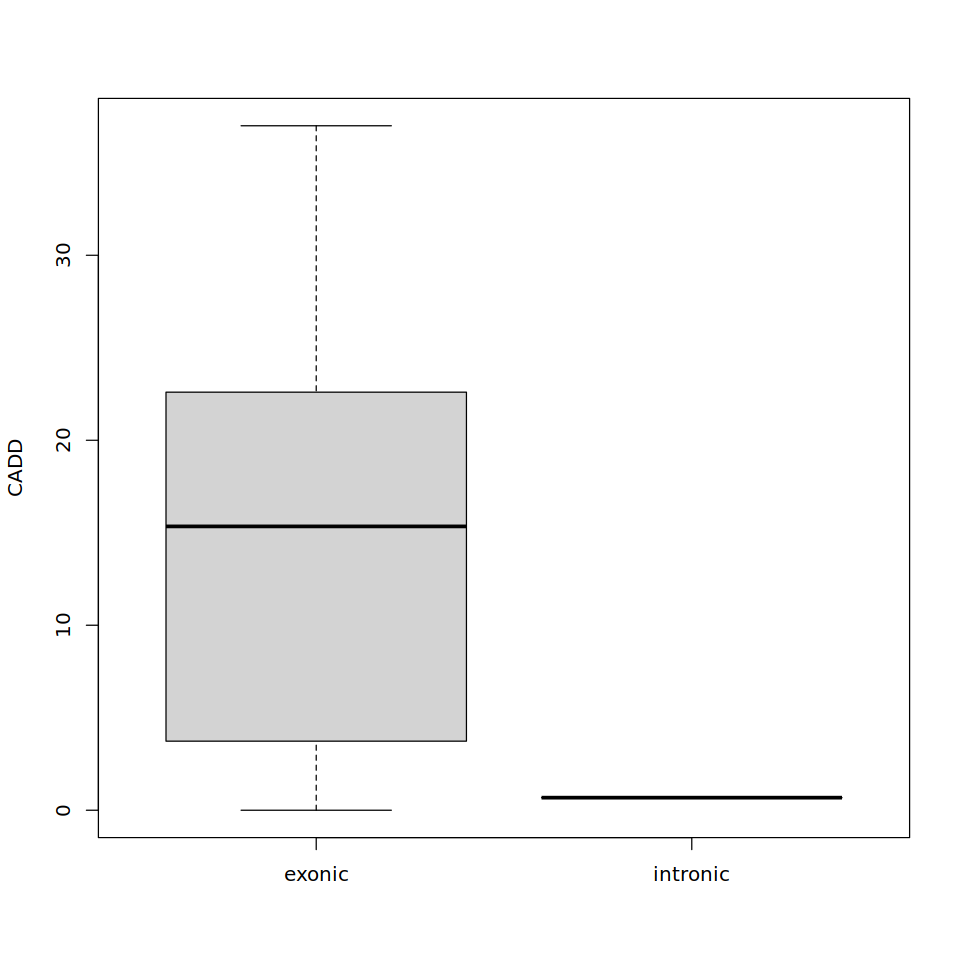

In [38]:
##### cell 38

# since there are no NAs in Func.refGene (cf. cell 36), we can remove which() in subsetting for this variable in the next commands

summary(brca1_snps$CADD_phred[is_exonic], na.rm = TRUE)
summary(brca1_snps$CADD_phred[is_intronic], na.rm = TRUE)

options(repr.plot.width = 8, repr.plot.height = 8)
boxplot(brca1_snps$CADD_phred[is_exonic], brca1_snps$CADD_phred[is_intronic], 
        names = c('exonic', 'intronic'), ylab = 'CADD')

<div class="alert alert-warning"> 
    <b>Question 8) </b>:
    <br>
         &emsp;Pouvez-vous effectuer un test statistique afin de savoir si la différence de pathogénicité prédite par le score CADD selon la localistion exon | intron d'un SNP est significative ?
</div>

## V. Etude des génotypes selon les metadata (géographie et sexe)
---

### V.A. Préparation des données

- Nous nous focalisons sur les **sujets présents à la fois dans `metadata` et dans `brca1_genotypes`**.

Le nombre de sujets en commun est donné par la commande suivante:

In [39]:
##### cell 39
length(intersect(metadata$SampleID, colnames(brca1_genotypes)))

[1] 2503

Nous créons à présent 2 sous-dataframes avec ces seuls sujets en commun:

In [40]:
##### cell 40

#  metadata and SNPS
brca1_genotypes_filt <- brca1_genotypes[ , colnames(brca1_genotypes) %in% metadata$SampleID]
str(brca1_genotypes_filt)

metadata_filt <- metadata[metadata$SampleID %in% colnames(brca1_genotypes_filt), ]
str(metadata_filt)

 num [1:1969, 1:2503] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2503] "HG00096" "HG00097" "HG00099" "HG00100" ...
'data.frame':	2503 obs. of  7 variables:
 $ FamilyID       : chr  "HG00096" "HG00097" "HG00099" "HG00100" ...
 $ SampleID       : chr  "HG00096" "HG00097" "HG00099" "HG00100" ...
 $ FatherID       : chr  "0" "0" "0" "0" ...
 $ MotherID       : chr  "0" "0" "0" "0" ...
 $ Sex            : int  1 2 2 2 1 2 1 1 2 1 ...
 $ Population     : chr  "GBR" "GBR" "GBR" "GBR" ...
 $ Superpopulation: chr  "EUR" "EUR" "EUR" "EUR" ...


- Nous créons ci-dessous des **sous-jeux de données pour les différentes catégories de populations**:
    - Hommes
    - Femmes
    - Afrique (AFR)
    - Asie de l'est (EAS)
    - Asie du sud (SAS)

<div class="alert alert-warning"> 
    <b>Question 9) </b> :
    <br>
         &emsp; Complétez la commande suivante pour créer le vecteur <code>sample_AFR</code>.
</div>

Pour ce faire nous identifions d'abord les sujets appartenant à chaque catégorie de population.

In [41]:
##### cell 41

# generating a vector with subjects per category

sample_man <- metadata_filt$SampleID[metadata_filt$Sex == 1]

sample_wom <- metadata_filt$SampleID[metadata_filt$Sex == 2]

sample_AFR <- metadata_filt$SampleID[metadata_filt$Superpopulation == 'AFR'] # XXX
#sample_AFR <- metadata_filt$SampleID[XXX] # XXX

sample_EAS <- metadata_filt$SampleID[metadata_filt$Superpopulation == 'EAS']

sample_SAS <- metadata_filt$SampleID[metadata_filt$Superpopulation == 'SAS']

sample_three_pop <- c(sample_AFR, sample_EAS, sample_SAS)

Puis nous extrayons les colonnes correspondantes dans la matrice brca1_genotypes.

In [42]:
##### cell 42

## Filtering
brca1_man <- brca1_genotypes_filt[ ,sample_man]
brca1_wom <- brca1_genotypes_filt[ ,sample_wom]
brca1_AFR <- brca1_genotypes_filt[ ,sample_AFR]
brca1_EAS <- brca1_genotypes_filt[ ,sample_EAS]
brca1_SAS <- brca1_genotypes_filt[ ,sample_SAS]

### V.B. Comparaison des distributions des fréquences des allèles ALT sur l'ensemble des variants

- On calcule ensuite le **nombre total et la proportion d'allèles alternatifs présents dans les différentes catégories de population** sur l'ensemble des variants.

Nous pouvons déjà compter le nombre de génotypes dans une sous-population, par exemple dans le sous-groupe de femmes.

In [43]:
##### cell 43

table(brca1_wom)

brca1_wom
      0       1       2 
2377745   86498   38356 

Et en déduire le nombre d'observations de l'allèle ALT. Atention, les homozygotes en ont 2 copies!

In [44]:
##### cell 44

86498 +  2 * 38356


[1] 163210

On peut utiliser la fonction `sum()` pour directement compter le nombre  d'observations de l'allèle ALT  et en déduire sa fréquence) pour chaque catégorie de la population:

In [45]:
##### cell 45

# Comparing the number of ALT between population

## Counting
cat("====Counts:")
cat("\n------Women and Men:\n")
sum(brca1_wom)
sum(brca1_man)
cat("------Geographic:\n")
sum(brca1_AFR)
sum(brca1_EAS)
sum(brca1_SAS)

cat("\n====Proportions:")
cat("\n------Women and Men:\n")
round(sum(brca1_wom) / (dim(brca1_wom)[1]*dim(brca1_wom)[2]*2), 4)
round(sum(brca1_man) / (dim(brca1_man)[1]*dim(brca1_man)[2]*2), 4)
cat("------Geographic:\n")
round(sum(brca1_AFR) / (dim(brca1_AFR)[1]*dim(brca1_AFR)[2]*2), 4)
round(sum(brca1_EAS) / (dim(brca1_EAS)[1]*dim(brca1_EAS)[2]*2), 4)
round(sum(brca1_SAS) / (dim(brca1_SAS)[1]*dim(brca1_SAS)[2]*2), 4)

====Counts:
------Women and Men:


[1] 163210

[1] 163024

------Geographic:


[1] 84028

[1] 60771

[1] 79504


====Proportions:
------Women and Men:


[1] 0.0326

[1] 0.0336

------Geographic:


[1] 0.0323

[1] 0.0306

[1] 0.0413

<div class="alert alert-warning"> 
    <b>Question 10) </b>:
    <br>
         &emsp; Commentez brièvement (un ou deux court·s paragraphe·s) les fréquences en fonction des sous-populations.
</div>

### V.C. Comparaison des fréquences de l'allèle ALT pour un SNV d'intérêt

- A titre d'exemple, nous nous focalisons sur le variant [rs8176166](https://www.ncbi.nlm.nih.gov/snp/rs8176166)

In [46]:
##### cell 46
brca1_snps[which(brca1_snps$avsnp150 == "rs8176166"), 1:20]

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,Func.ensGene,Gene.ensGene,GeneDetail.ensGene,ExonicFunc.ensGene,AAChange.ensGene,avsnp150,gnomAD_exome_ALL,gnomAD_exome_AFR,gnomAD_exome_AMR,gnomAD_exome_ASJ
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2147,17,43088260,43088260,T,C,intronic,BRCA1,NA,NA,NA,intronic,BRCA1,NA,NA,NA,rs8176166,NA,NA,NA,NA


- La fonction suivante vous est donnée afin de pouvoir effectuer des tests de ${\chi}^2$ ou des test exact de Fisher sur la présence de SNP d'intérêt entre deux populations.
Ici, le test exact de Fisher nous donnera la même information qu'un test de ${\chi}^2$ mais il est dit _exact_ car le calcul de la valeur _p_ ne dépend pas d'un calcul basé sur un approximation...C'est un test non paramétrique toujours utilisable.

In [47]:
##### cell 47

# Function for statistical test between two populations
stat_test <- function(matrix_1, matrix_2, wanted_snp, fisher = FALSE) {
  tab_1 <- table(matrix_1[wanted_snp, ])
  tab_2 <- table(matrix_2[wanted_snp, ])
  name_1 <- deparse(substitute(matrix_1))
  name_2 <- deparse(substitute(matrix_2))
  # Replace empty values by zeroes if needed
  if(is.na(tab_1[2])) tab_1[2] <- 0
  if(is.na(tab_2[2])) tab_2[2] <- 0
  if(is.na(tab_1[3])) tab_1[3] <- 0
  if(is.na(tab_2[3])) tab_2[3] <- 0
  
  cont_tab <- rbind(tab_1, tab_2)
  rownames(cont_tab) <- c(name_1, name_2)
  colnames(cont_tab) <- 0:2  
  print(cont_tab)
  
  if(fisher == TRUE) {
    out_fish <- fisher.test(cont_tab)
    return(out_fish)
  }
  
  out_chi <- chisq.test(cont_tab)
  return(out_chi)
}

In [48]:
##### cell 48
wanted_snp_1 <- brca1_snps$avsnp150 == 'rs8176166'

In [49]:
##### cell 49
cat("=============== Chisquare tests: ===============\n")
cat("\n----- AFR versus SAS\n")
stat_test(matrix_1 = brca1_AFR, matrix_2 = brca1_SAS, wanted_snp = wanted_snp_1)
cat("\n----- AFR versus EAS\n")
stat_test(matrix_1 = brca1_AFR, matrix_2 = brca1_EAS, wanted_snp = wanted_snp_1)
cat("\n----- SAS versus EAS\n")
stat_test(matrix_1 = brca1_SAS, matrix_2 = brca1_EAS, wanted_snp = wanted_snp_1)
cat("\n=============== Fisher exact tests: ===============\n")
cat("\n----- AFR versus SAS\n")
stat_test(matrix_1 = brca1_AFR, matrix_2 = brca1_SAS, wanted_snp = wanted_snp_1, fisher = TRUE)
cat("\n----- AFR versus EAS\n")
stat_test(matrix_1 = brca1_AFR, matrix_2 = brca1_EAS, wanted_snp = wanted_snp_1, fisher = TRUE)
cat("\n----- SAS versus EAS\n")
stat_test(matrix_1 = brca1_SAS, matrix_2 = brca1_EAS, wanted_snp = wanted_snp_1, fisher = TRUE)

=============== Chisquare tests: ===============

----- AFR versus SAS
            0   1  2
brca1_AFR 564  92  4
brca1_SAS 208 233 48



	Pearson's Chi-squared test

data:  cont_tab
X-squared = 242.49, df = 2, p-value < 2.2e-16



----- AFR versus EAS
            0  1 2
brca1_AFR 564 92 4
brca1_EAS 420 80 4


Warning message in chisq.test(cont_tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  cont_tab
X-squared = 1.0215, df = 2, p-value = 0.6



----- SAS versus EAS
            0   1  2
brca1_SAS 208 233 48
brca1_EAS 420  80  4



	Pearson's Chi-squared test

data:  cont_tab
X-squared = 183.4, df = 2, p-value < 2.2e-16



=============== Fisher exact tests: ===============

----- AFR versus SAS
            0   1  2
brca1_AFR 564  92  4
brca1_SAS 208 233 48



	Fisher's Exact Test for Count Data

data:  cont_tab
p-value < 2.2e-16
alternative hypothesis: two.sided



----- AFR versus EAS
            0  1 2
brca1_AFR 564 92 4
brca1_EAS 420 80 4



	Fisher's Exact Test for Count Data

data:  cont_tab
p-value = 0.6087
alternative hypothesis: two.sided



----- SAS versus EAS
            0   1  2
brca1_SAS 208 233 48
brca1_EAS 420  80  4



	Fisher's Exact Test for Count Data

data:  cont_tab
p-value < 2.2e-16
alternative hypothesis: two.sided


<div class="alert alert-warning"> 
    <b>Question 10) </b>:
    <br>
         &emsp;En observant les différentes table de contingence et les résultats des tests statistiques, diriez-vous pour le SNP considéré que les affirmations suivantes sont vraies ?:
    <br>
    &emsp; - Les populations <code>AFR</code> et <code>EAS</code> sont plus proches entre elles qu'elles ne le sont de <code>SAS</code>
    <br>
    &emsp; - Les populations <code>EAS</code> et <code>SAS</code> sont plus proches entre elles qu'elles ne le sont de <code>AFR</code>
    <br>
    &emsp; - Ces résultats sont généralisables à l'ensemble des SNP du génome.
    <br>
    &emsp; - le test de Chi^2 entre <code>AFR</code> et <code>EAS</code> envoie un <i>warning message</i> car l'une des catégories présente un faible effectif.
</div>

## VI. Analyse multidimensionnelle
---

La section suivante est un bonus et ne comptera que positiviement dans la note finale.

Regardez la vidéo suivante afin de mieux comprendre la PCA en 5 minutes https://youtu.be/HMOI_lkzW08 !

<div class="alert alert-block alert-danger">
    <b>Attention:</b> 
    La commande suivante peut prendre un peu de temps (environ 5 à 10 minutes) de calcul. Lancez-là pendant que vous regardez la vidéo.
    <br>
    Patience patience ...
</div>

In [50]:
##### cell 50
# PCA
system.time({
brca1_pca <- 
  FactoMineR::PCA(X = t(brca1_genotypes_filt), ncp = 2, graph = FALSE)
 })

    user   system  elapsed 
 494.645 3597.271 1282.130 

In [51]:
##### cell 51
brca1_pca_forplot <-
  cbind(brca1_pca$ind$coord[,1:2], metadata_filt)

Représentation des deux premières dimensions (principal components) avec les points (qui représentent donc les individus) colorés en fonction du sexe.

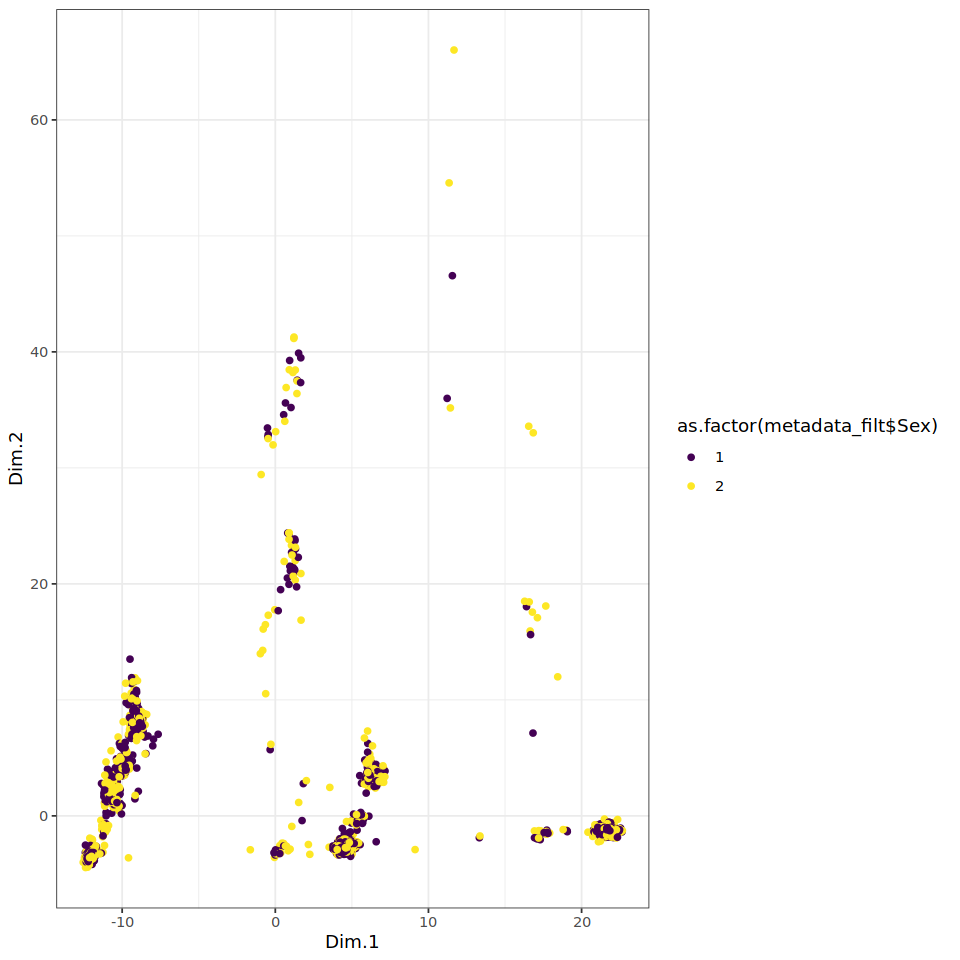

In [52]:
##### cell 52
ggplot(as.data.frame(brca1_pca_forplot)) +
  geom_point(aes(x = Dim.1, y = Dim.2, colour = as.factor(metadata_filt$Sex))) +
  scale_colour_viridis_d() +
  theme_bw()

Représentation des deux premières dimensions (principal components) avec les points (qui représentent donc les individus) colorés en fonction de la population.

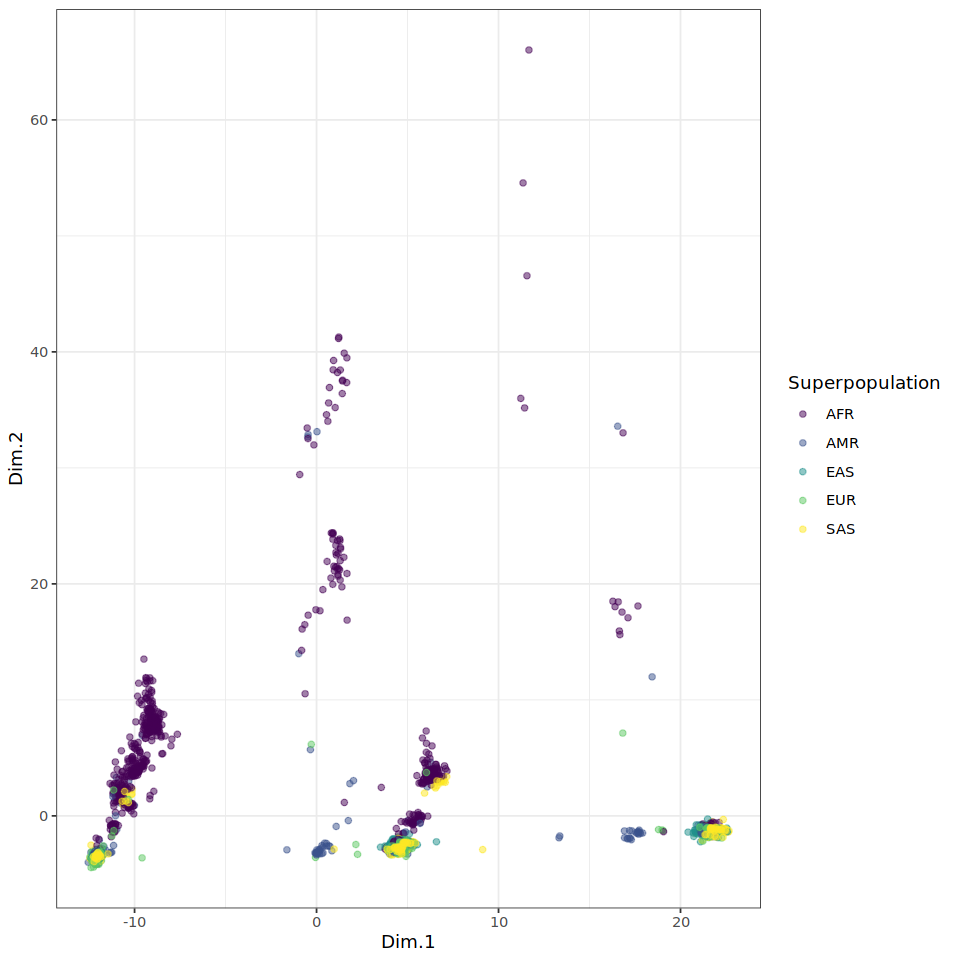

In [53]:
##### cell 53
ggplot(as.data.frame(brca1_pca_forplot)) +
  geom_point(aes(x = Dim.1, y = Dim.2, colour = Superpopulation), alpha = 0.5) +
  scale_colour_viridis_d() +
  theme_bw()

On approfondit avec le paquet factoextra:

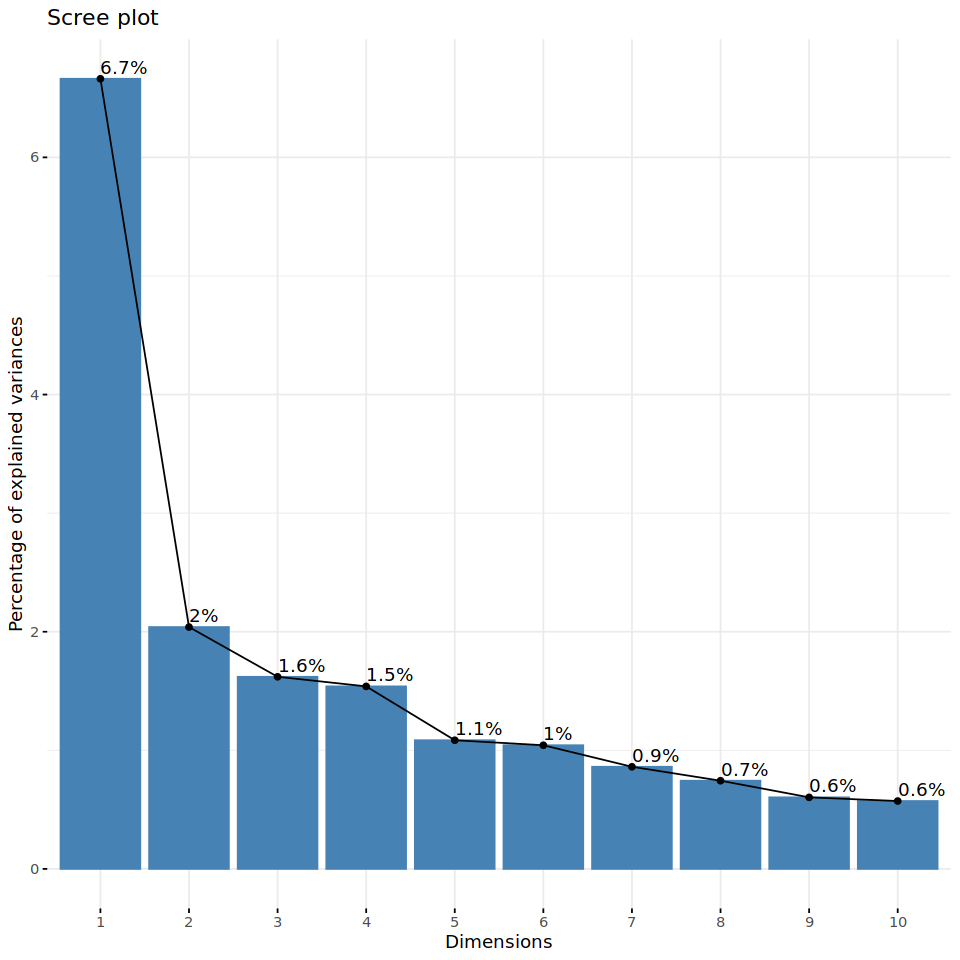

In [54]:
##### cell 54
factoextra::fviz_eig(brca1_pca, addlabels = TRUE)

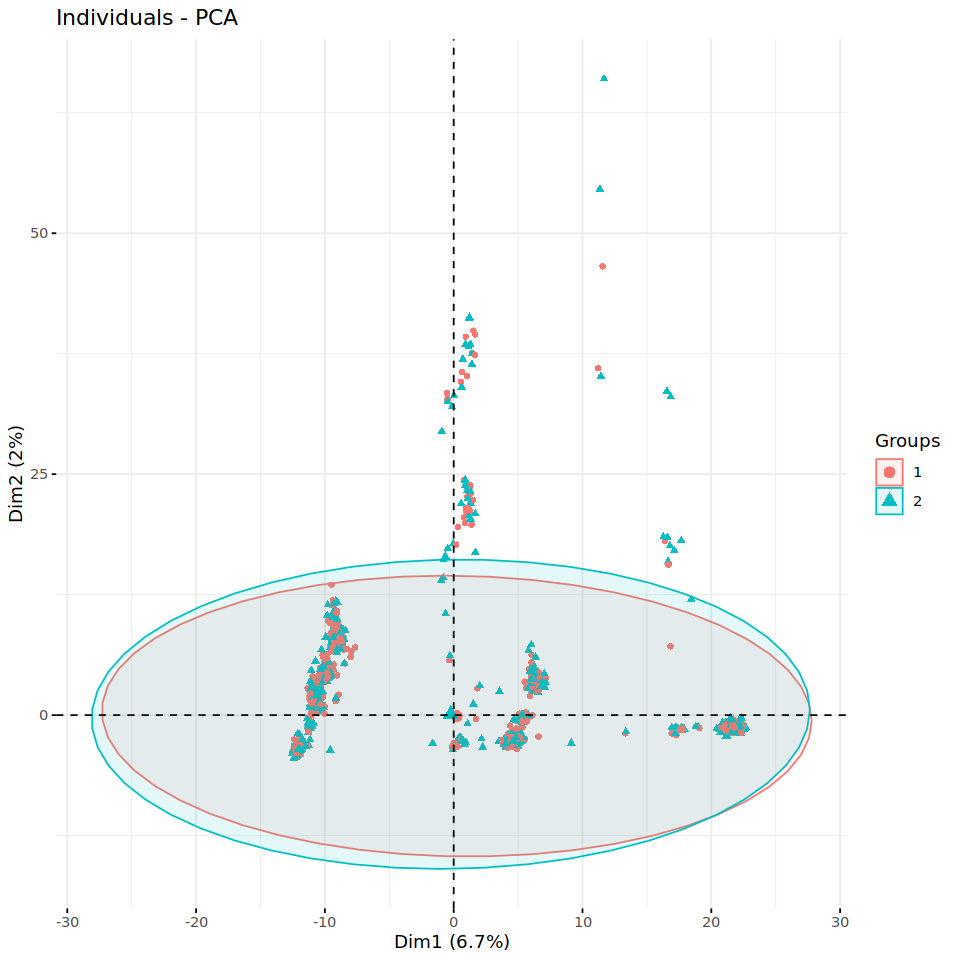

In [55]:
##### cell 55
factoextra::fviz_pca_ind(brca1_pca, label = "none", habillage = as.factor(metadata_filt$Sex),
             addEllipses = TRUE, ellipse.level = 0.95)

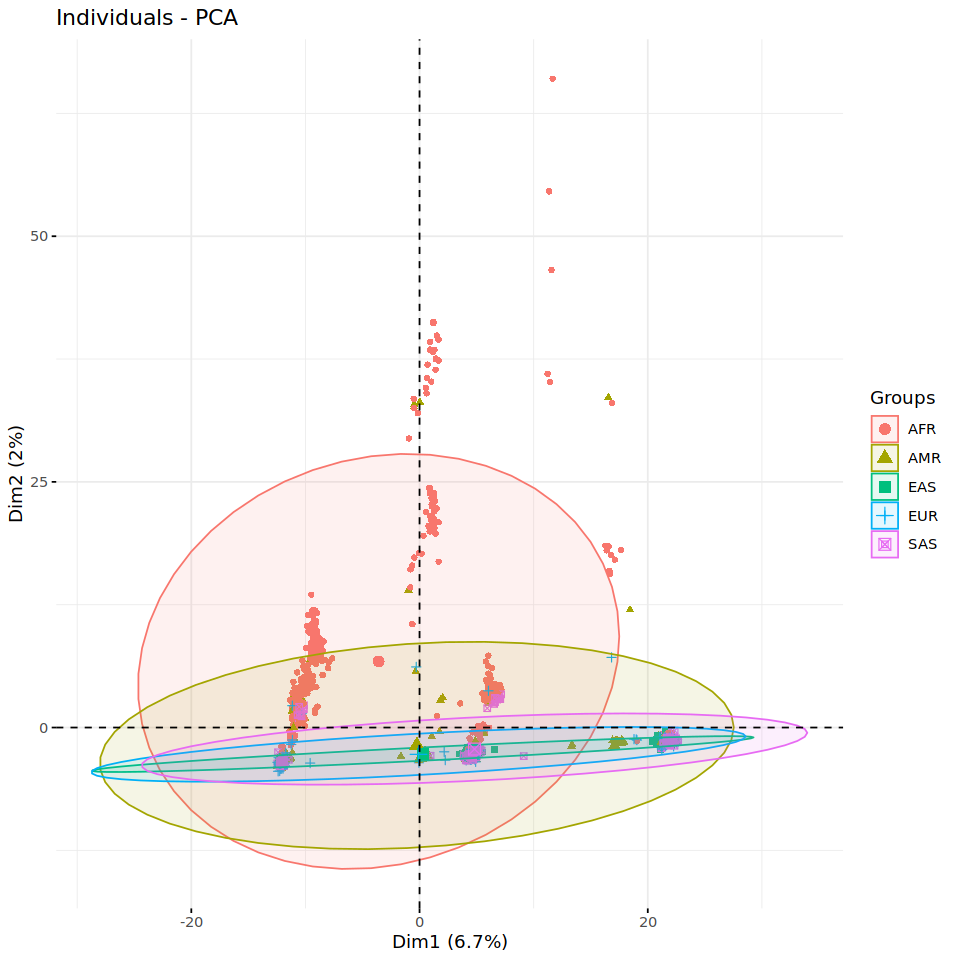

In [56]:
##### cell 56
factoextra::fviz_pca_ind(brca1_pca, label = "none", habillage = as.factor(metadata_filt$Superpopulation),
             addEllipses = TRUE, ellipse.level = 0.95)

<div class="alert alert-warning"> 
    <b>Question bonus) </b>:
    <br>
         &emsp; Décrivez et essayez d'interpreter les graphiques issus de cette PCA.
</div>

*[Last edition: 19/04/2023 by CVandiedonck]*